# MENTAL HEALTH PREDICTION

### Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import ExtraTreesClassifier

## Loading Dataset and initial understanding of data

In [2]:
data = pd.read_csv("survey.csv",encoding = 'latin')
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Column Description:

Timestamp:when the record is created

Age: Age of employee

Country: Country the employee belongs to

Gender: Gender of Employee

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse 
treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

In [3]:
#data types of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
#data row count
print(data.shape)
    
#distribution of the data
print(data.describe())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


## Data Cleaning : 

Dataset has unwanted columns to our problem statement. It will also have Null values, Duplicates. Let's treat them.
Dropping unwanted columns

We find Timestamp and Comments columns irrelevant to our problem statement. So we choose to remove these

In [5]:
#Let’s get rid of the variables "Timestamp",“comments” just to make our lives easier.
data = data.drop(['comments'], axis= 1)
# data = data.drop(['state'], axis= 1)
data = data.drop(['Timestamp'], axis= 1)

data.isnull().sum().max() #just checking that there's no missing data missing...

515

In [6]:
data.head(6)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No


### Dealing with missing data:

We are cleaning missing values with replacing them with 0's for integer columns, Nan's for string columns, 0.0 for float columns

In [7]:
#clean NaN
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intColumns = ['Age']
stringColumns = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence','benefits', 'care_options', 'wellness_program',
                 'seek_help','state']
floatColumns = []

# Clean the NaN's
for feature in data:
    if feature in intColumns:
        data[feature] = data[feature].fillna(defaultInt)
    elif feature in stringColumns:
        data[feature] = data[feature].fillna(defaultString)
    elif feature in floatColumns:
        data[feature] = data[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
data.head(6)  

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No


We are replacing missing values Age with median

In [8]:
#Clean Age
#complete missing age with mean
data['Age'].fillna(data['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(data['Age'])
s[s<18] = data['Age'].median()
data['Age'] = s
s = pd.Series(data['Age'])
s[s>120] = data['Age'].median()
data['Age'] = s

#Ranges of Age
data['age_range'] = pd.cut(data['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

We are further cleaning our data of self_employed column by replcaing the NaN values to 'No' 

In [9]:
#change NaN to NOT self_employed
#Replace "NaN" string from defaultString
data['self_employed'] = data['self_employed'].replace([defaultString], 'No')
data

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,Male,United States,TX,No,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,21-30
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,31-65
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,31-65
1257,46,f,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Yes,No,No,No,No,No,No,No,31-65


 We are further cleaning our data of Work_interference column by replacing the NaN values to "Dont know" 

In [10]:
#change NaN to "Don't know" in work_interfere
#Replace "NaN" string from defaultString

data['work_interfere'] = data['work_interfere'].replace([defaultString], 'Dont know' )
data['work_interfere'].unique()
data

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,Male,United States,TX,No,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,Dont know,26-100,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,21-30
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,31-65
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,31-65
1257,46,f,United States,NC,No,No,No,Dont know,100-500,Yes,...,Don't know,Yes,No,No,No,No,No,No,No,31-65


### Cleaning columns by grouping values to a standard group value:

Since most of our columns are categorical we are reducing the groups in columns by categorizing the values which are spelling mistakes or synonymns

#### Clean Gender
Gender:
We have come across many values in gender column which are mostly spelling mistakes/synonymns/acronymns for Male, female, trans. So we have decided to group them accordingly

In [11]:

#Slower case all columm's elements
gender = data['Gender'].str.lower()
#Select unique elements
gender = data['Gender'].unique()

#Made gender groups
maleGrp = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
#trans groups
transGrp = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
#female group
femaleGrp = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (rows, columns) in data.iterrows():
    if str.lower(columns.Gender) in maleGrp:
        data['Gender'].replace(to_replace=columns.Gender, value='Male', inplace=True)

    if str.lower(columns.Gender) in femaleGrp:
        data['Gender'].replace(to_replace=columns.Gender, value='Female', inplace=True)

    if str.lower(columns.Gender) in transGrp:
        data['Gender'].replace(to_replace=columns.Gender, value='Trans', inplace=True)


genderList = ['A little about you', 'p']
data = data[~data['Gender'].isin(genderList)]
data['Gender'].unique()

array(['Female', 'Male', 'Trans'], dtype=object)

#### Clean leave
Leave:
We have come across 5 categories in leave column in which somewhat easy ,very easy can be grouped to common term easy and somewhat difficult and very difficult to difficult.

In [12]:

#grouping leave values to easy , difficult, don't know
leave=data['leave']
easyGrp=['somewhat easy','very easy']
diffGrp=['somewhat difficult','very difficult']
for (rows, columns) in data.iterrows():
    if str.lower(columns.leave) in easyGrp:
        data['leave'].replace(to_replace=columns.leave, value='Easy', inplace=True)
    
    if str.lower(columns.leave) in diffGrp:
        data['leave'].replace(to_replace=columns.leave, value='Difficult', inplace=True)
        
data['leave'].unique()

/var/folders/n0/cnv_hxcs0c1bs51vz986xl1h0000gn/T/ipykernel_97060/3435495182.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['leave'].replace(to_replace=columns.leave, value='Easy', inplace=True)
/var/folders/n0/cnv_hxcs0c1bs51vz986xl1h0000gn/T/ipykernel_97060/3435495182.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['leave'].replace(to_replace=columns.leave, value='Difficult', inplace=True)


array(['Easy', "Don't know", 'Difficult'], dtype=object)

## Handling Duplicates:

In [13]:
len(data)

1257

In [14]:
#To find duplicated values
dup=data[data.duplicated()]
dup

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
821,35,Male,Denmark,NaN,Yes,Yes,Yes,Often,1-5,No,...,Easy,No,No,Some of them,Some of them,Maybe,Yes,Yes,No,31-65
860,32,Male,United Kingdom,NaN,No,Yes,Yes,Rarely,6-25,No,...,Don't know,Yes,Maybe,Some of them,No,No,No,No,No,31-65
1134,27,Male,New Zealand,NaN,No,No,No,Rarely,26-100,No,...,Difficult,Yes,No,No,No,No,Maybe,No,Yes,21-30
1218,28,Male,Netherlands,NaN,No,No,No,Dont know,6-25,No,...,Easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,21-30


dropping the duplicates

In [15]:
#drop duplicates
data = data.drop([821,860,1134,1218])
len(data)

1253

## Exploratory Data Analysis:

Let's check the distribution of data in our dataset, visualize graphs to see data distribution, relation between features.
This will help us to further process the data.

### Distribution of Treatment taken by employees and benefits provided to them

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


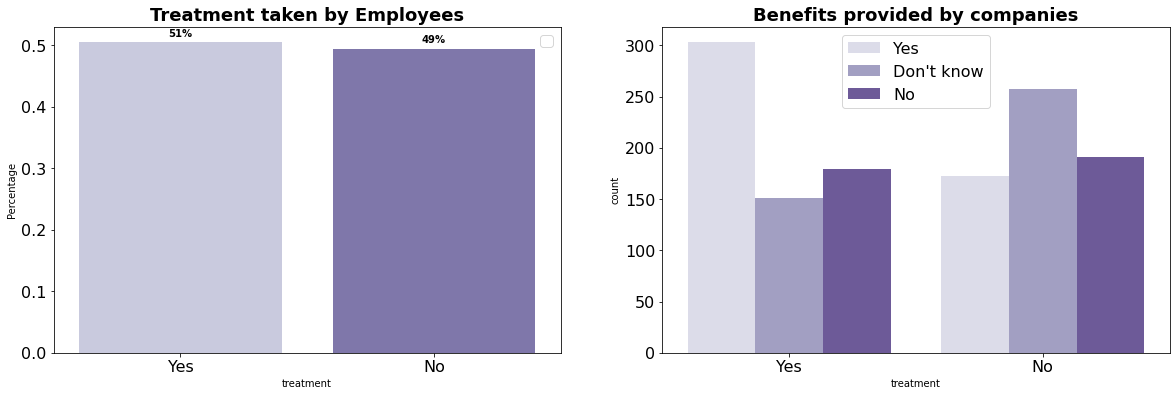

In [16]:
#Distribution of percentage of Treatment taken by employees
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = data['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Treatment taken by Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

#pie chart for treatment vs benefits
plt.subplot(1,2,2)
sns.countplot(data['treatment'], hue = data['benefits'], palette = 'Purples')
plt.title('Benefits provided by companies',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

#### Inference: 
51% of our dataset contains people who have taken treatment in past and among those 48% tell their companies provide benefits while 31% of those who didn't seek treatment tell their company provides benefits for the ill people.

### Distribution of mental health care provided to employees and how many availed the Treatment :

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


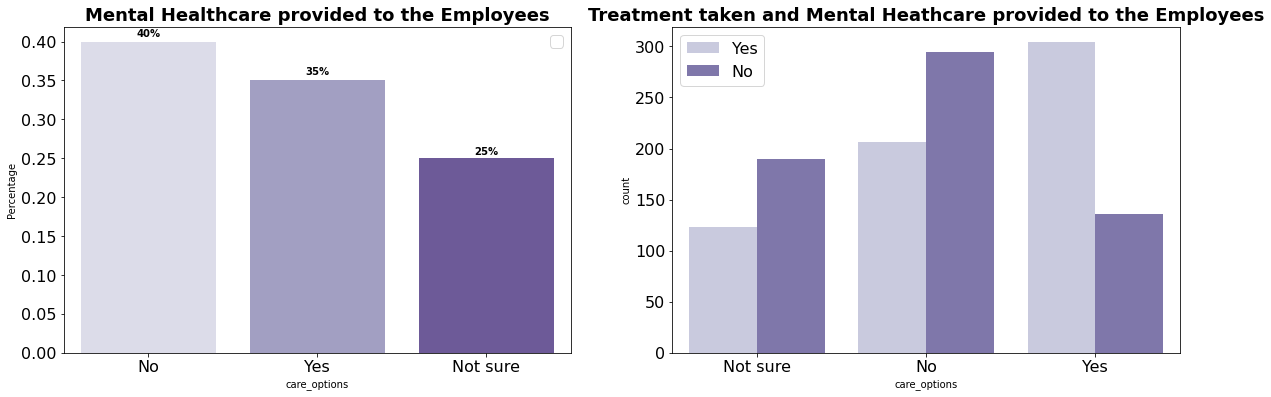

In [17]:
#to plot the percentage of care_options distribution and bar chart for it
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['care_options'].value_counts(normalize = True).rename_axis('care_options').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'care_options', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')  
    
plt.title('Mental Healthcare provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# pie chart for care_options vs treatment
plt.subplot(1,2,2)
sns.countplot(data['care_options'], hue = data['treatment'], palette='Purples')
plt.title('Treatment taken and Mental Heathcare provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

#### Inference: 
40% of the employees tell their companies provide care options for employees for mental health.

### Distribution of Leave column which states if it's easy to avail leave for mental health:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


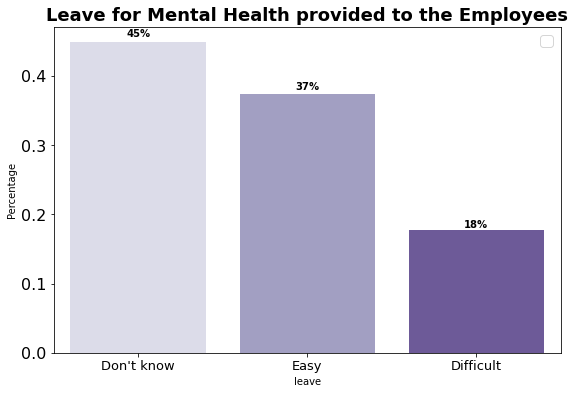

In [18]:
#to plot a barplot for the percentage of leave distribution
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

#### Inference: 
37% of our records say that it's easy to leave avail leave for mental health while 18% say no

### Distribution of records for mental_vs_physical

In [19]:
data.groupby(['mental_vs_physical']).count()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,obs_consequence,age_range
mental_vs_physical,,,,,,,,,,,,,,,,,,,,,
Don't know,575,575,575,575,575,575,575,575,575,575,...,575,575,575,575,575,575,575,575,575,575
No,338,338,338,338,338,338,338,338,338,338,...,338,338,338,338,338,338,338,338,338,338
Yes,340,340,340,340,340,340,340,340,340,340,...,340,340,340,340,340,340,340,340,340,340


### Distribution of mental vs physical column which states if employee think the employer takes mental health as serious as physical health

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


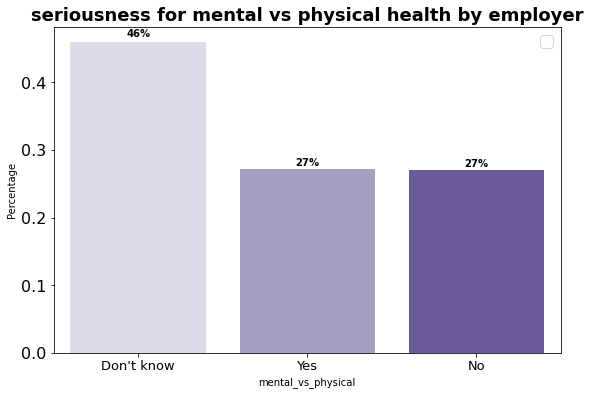

In [20]:
#to plot a barplot for percentage of mental_vs_physical distribution
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_vs_physical', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('seriousness for mental vs physical health by employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Distributions for consequences of sharing mental health issues with employer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


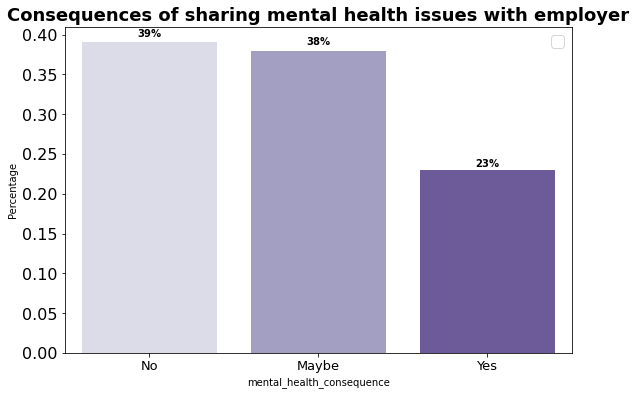

In [21]:
#to plot a barplot for percentage of mental_health_consequence distribution
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequences of sharing mental health issues with employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Distributions for consequences of sharing physical health issues issues with employer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


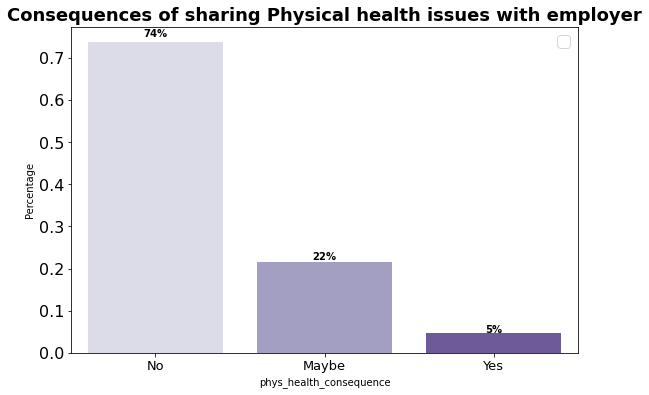

In [22]:
#to plot a barplot for the percentage of Physical_health_consequence distribution
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['phys_health_consequence'].value_counts(normalize = True).rename_axis('phys_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequences of sharing Physical health issues with employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

#### Inference: 
The impact of sharing mental health issues is very high than physical issues

### Distribution of number od employees in our dataset and how they are providing reach for employees to seek_help

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


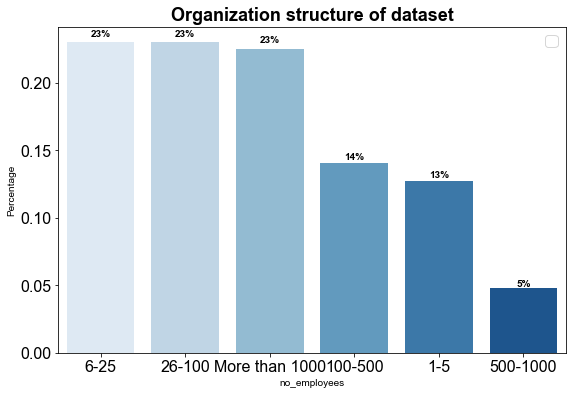

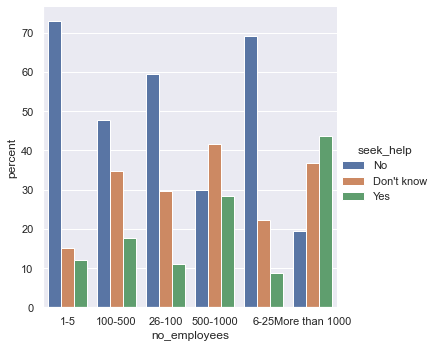

In [23]:
#to find percentage of no_employees distribution and make a barplot
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = data['no_employees'].value_counts(normalize = True).rename_axis('no_employees').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'no_employees', y = 'Percentage', data = eda_percentage, palette='Blues')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Organization structure of dataset', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

#pie chart for no of employees vs benefits
sns.set(color_codes=True)

x = 'no_employees'
y='seek_help'
(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

### Distribution of mentally ill people in United States

In [24]:
#making a copy of our recordset
statedata=data.copy()

In [25]:
#to drop countries which are not equal to United states
statedata.drop(statedata[statedata["Country"] !='United States'].index, inplace=True)
(statedata["Country"] !='United States').sum()

0

In [26]:
#drop 'Country'
statedata = statedata.drop(['Country'], axis=1)

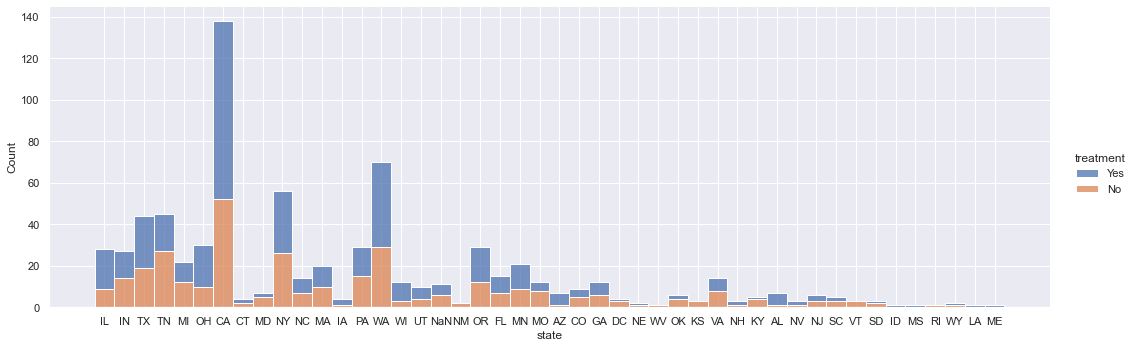

In [27]:
#to plot distribution of records for mentally ill people in US states
sns.displot(statedata, x='state', hue='treatment',aspect=3, multiple='stack')

### Distribution of records based on countries

/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


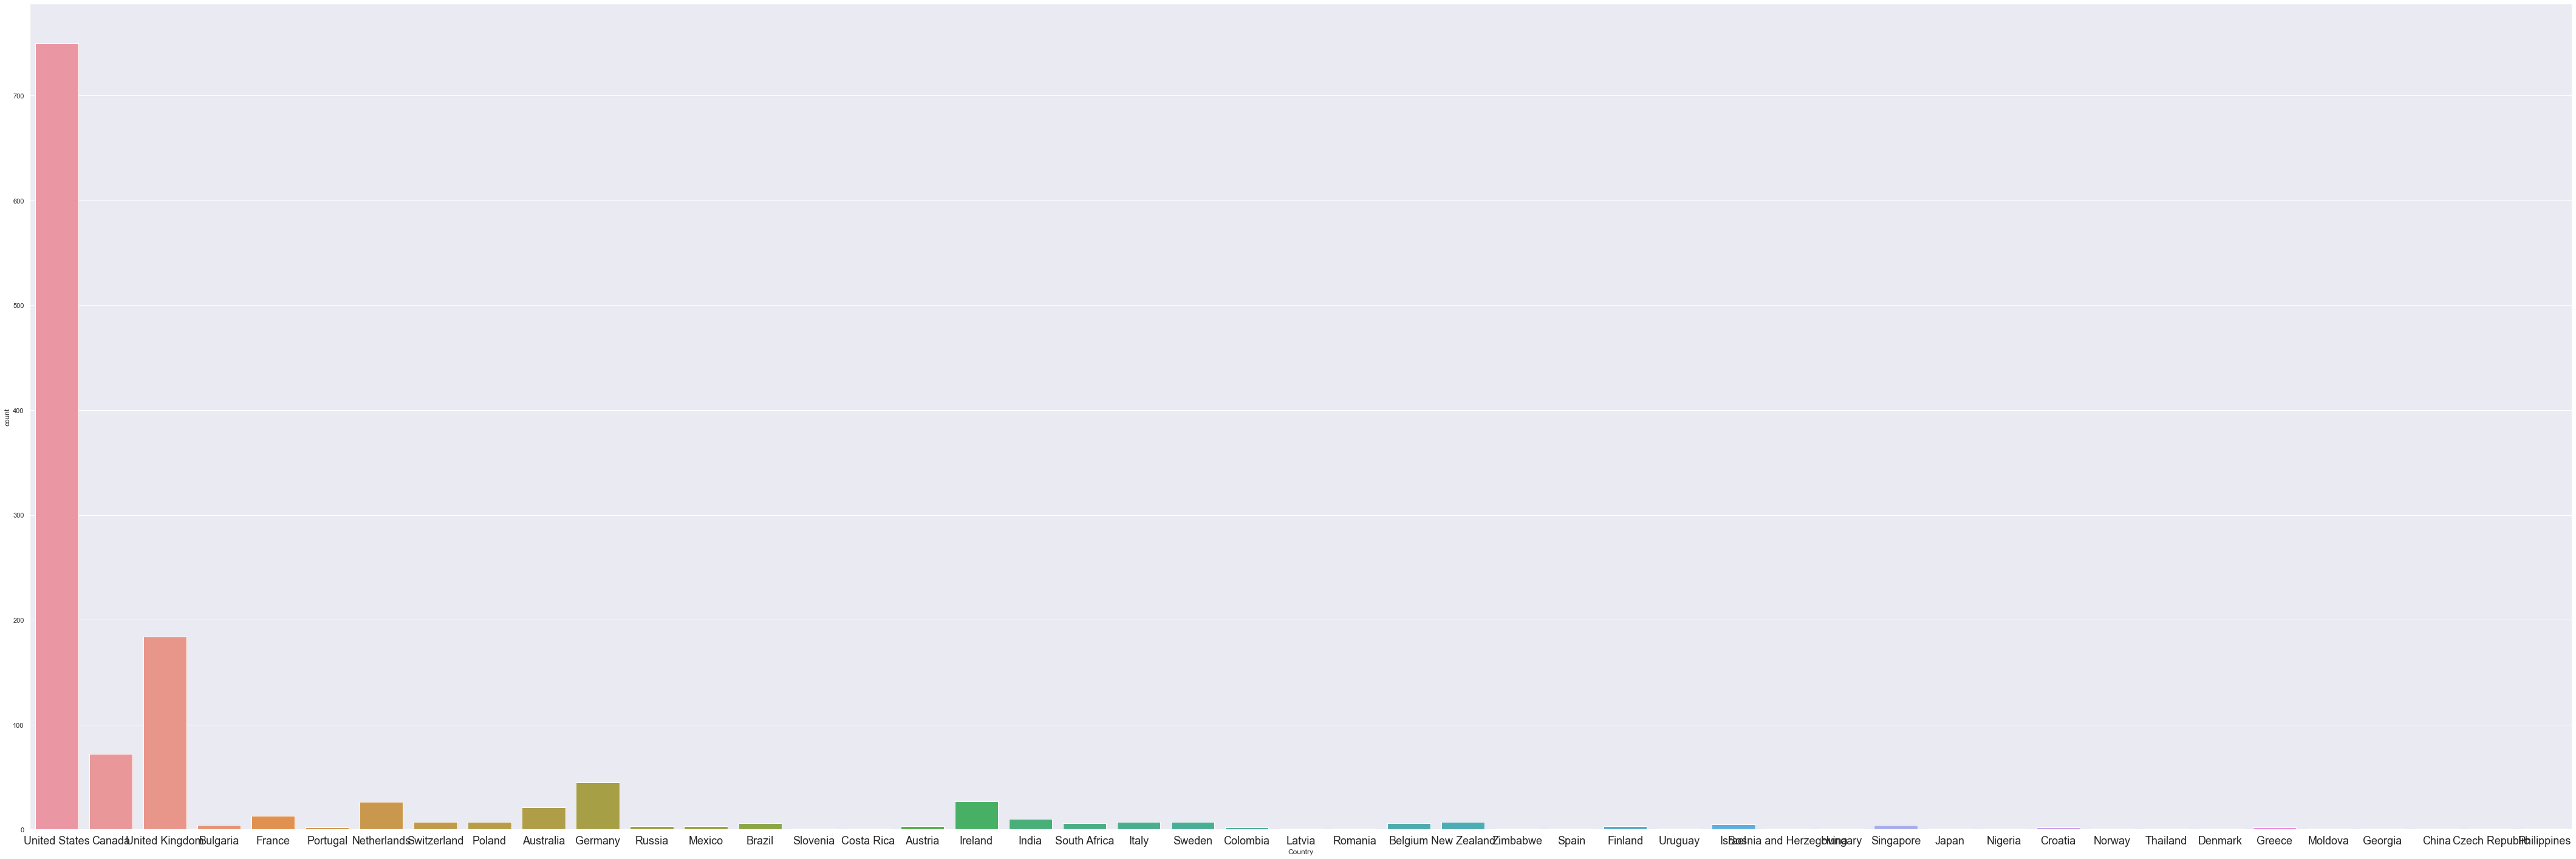

In [28]:
#a funtion to make countplot, parameters: data: dataset, feature: column which you want to plot
def countplot(data,feature):
    plt.figure(figsize=(75,25))
    plt.xticks(fontsize=18)
    sns.countplot(data[feature])
    plt.show()

#USData=data[(data["Country"]!='United States')]
x='Country'
countplot(data,x)

#### Inference: 
Since US has high records in our dataset which comprises almost 50% of our data let's check distribution without US

/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


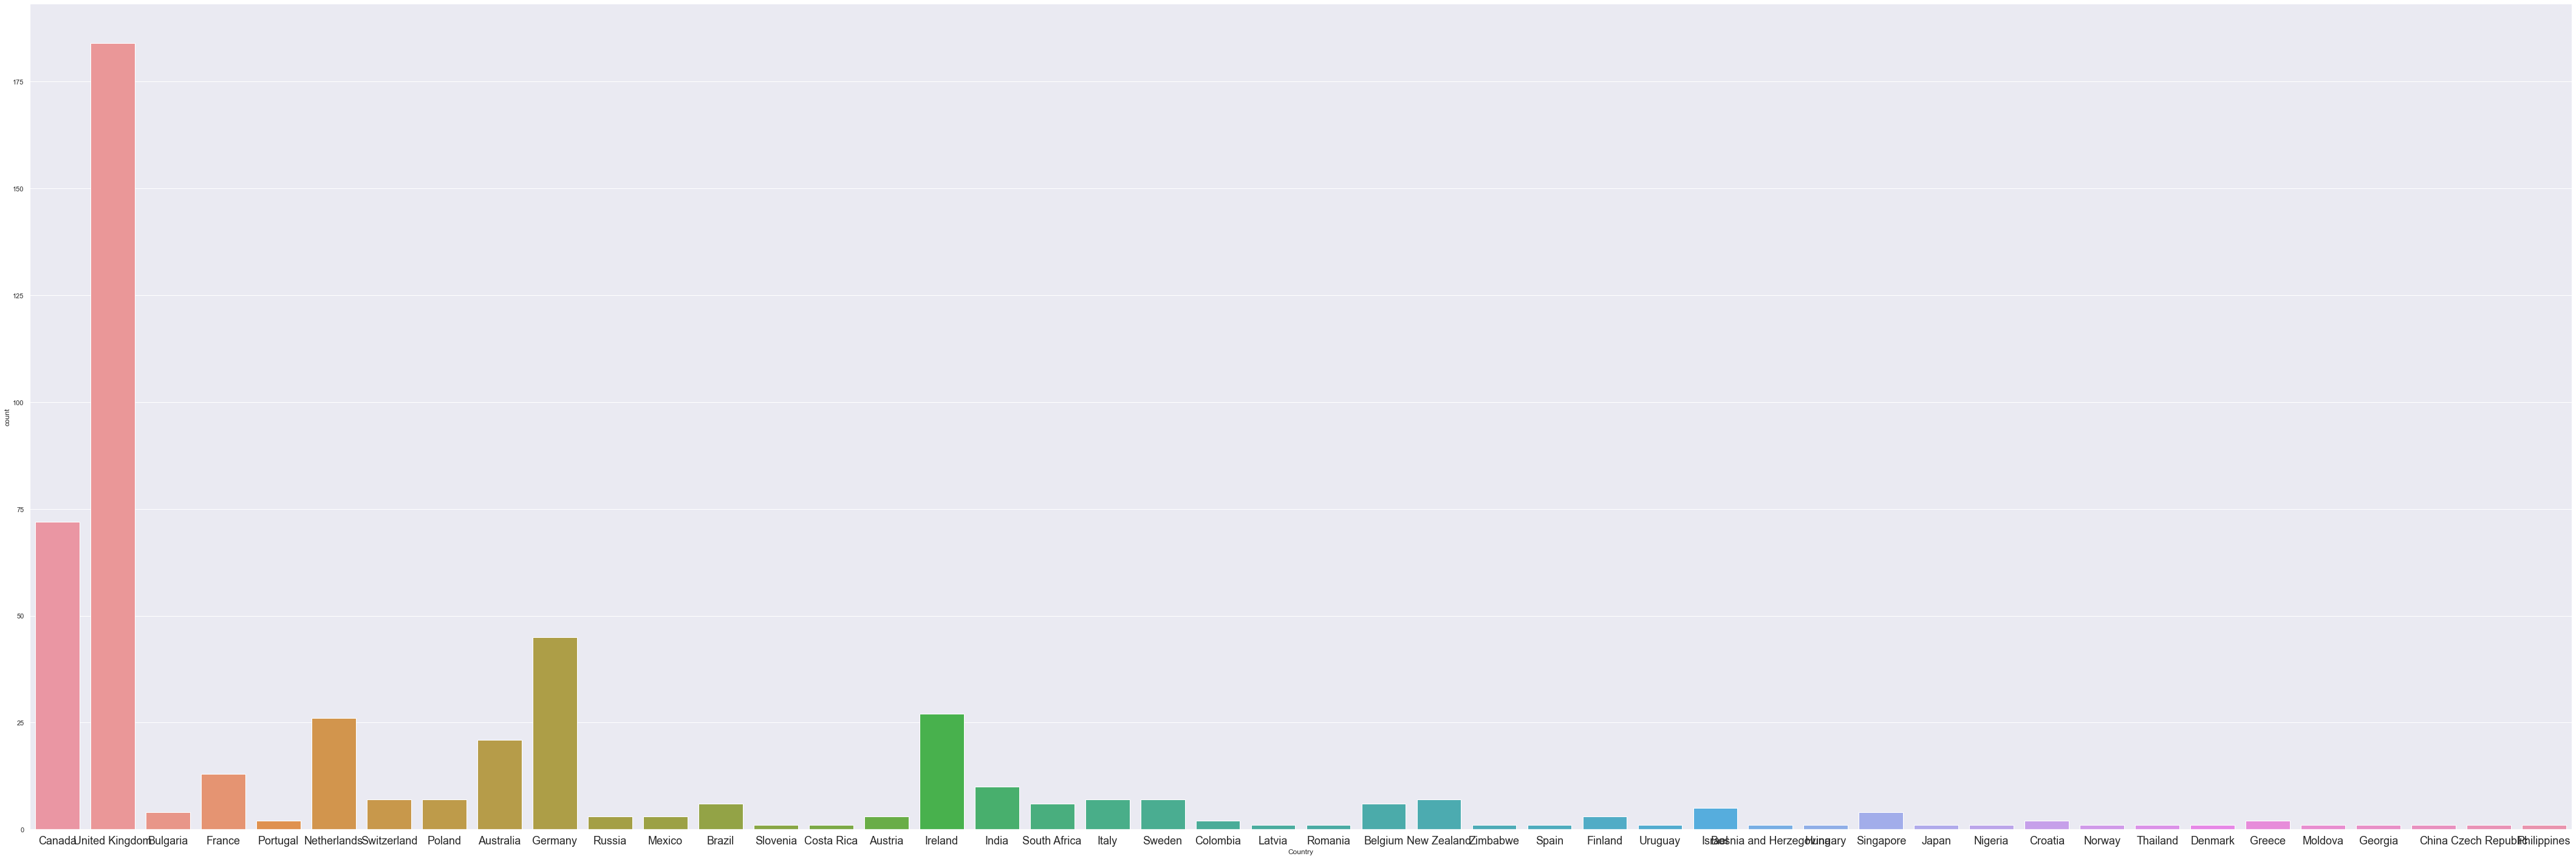

In [29]:
#countplot for distribution of records in countries except US
#USData=data[(data["Country"]!='United States')]
x='Country'
countplot(data[(data["Country"]!='United States')],x)

## Univariate Analysis 

#### For numerical column: 'Age'

/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


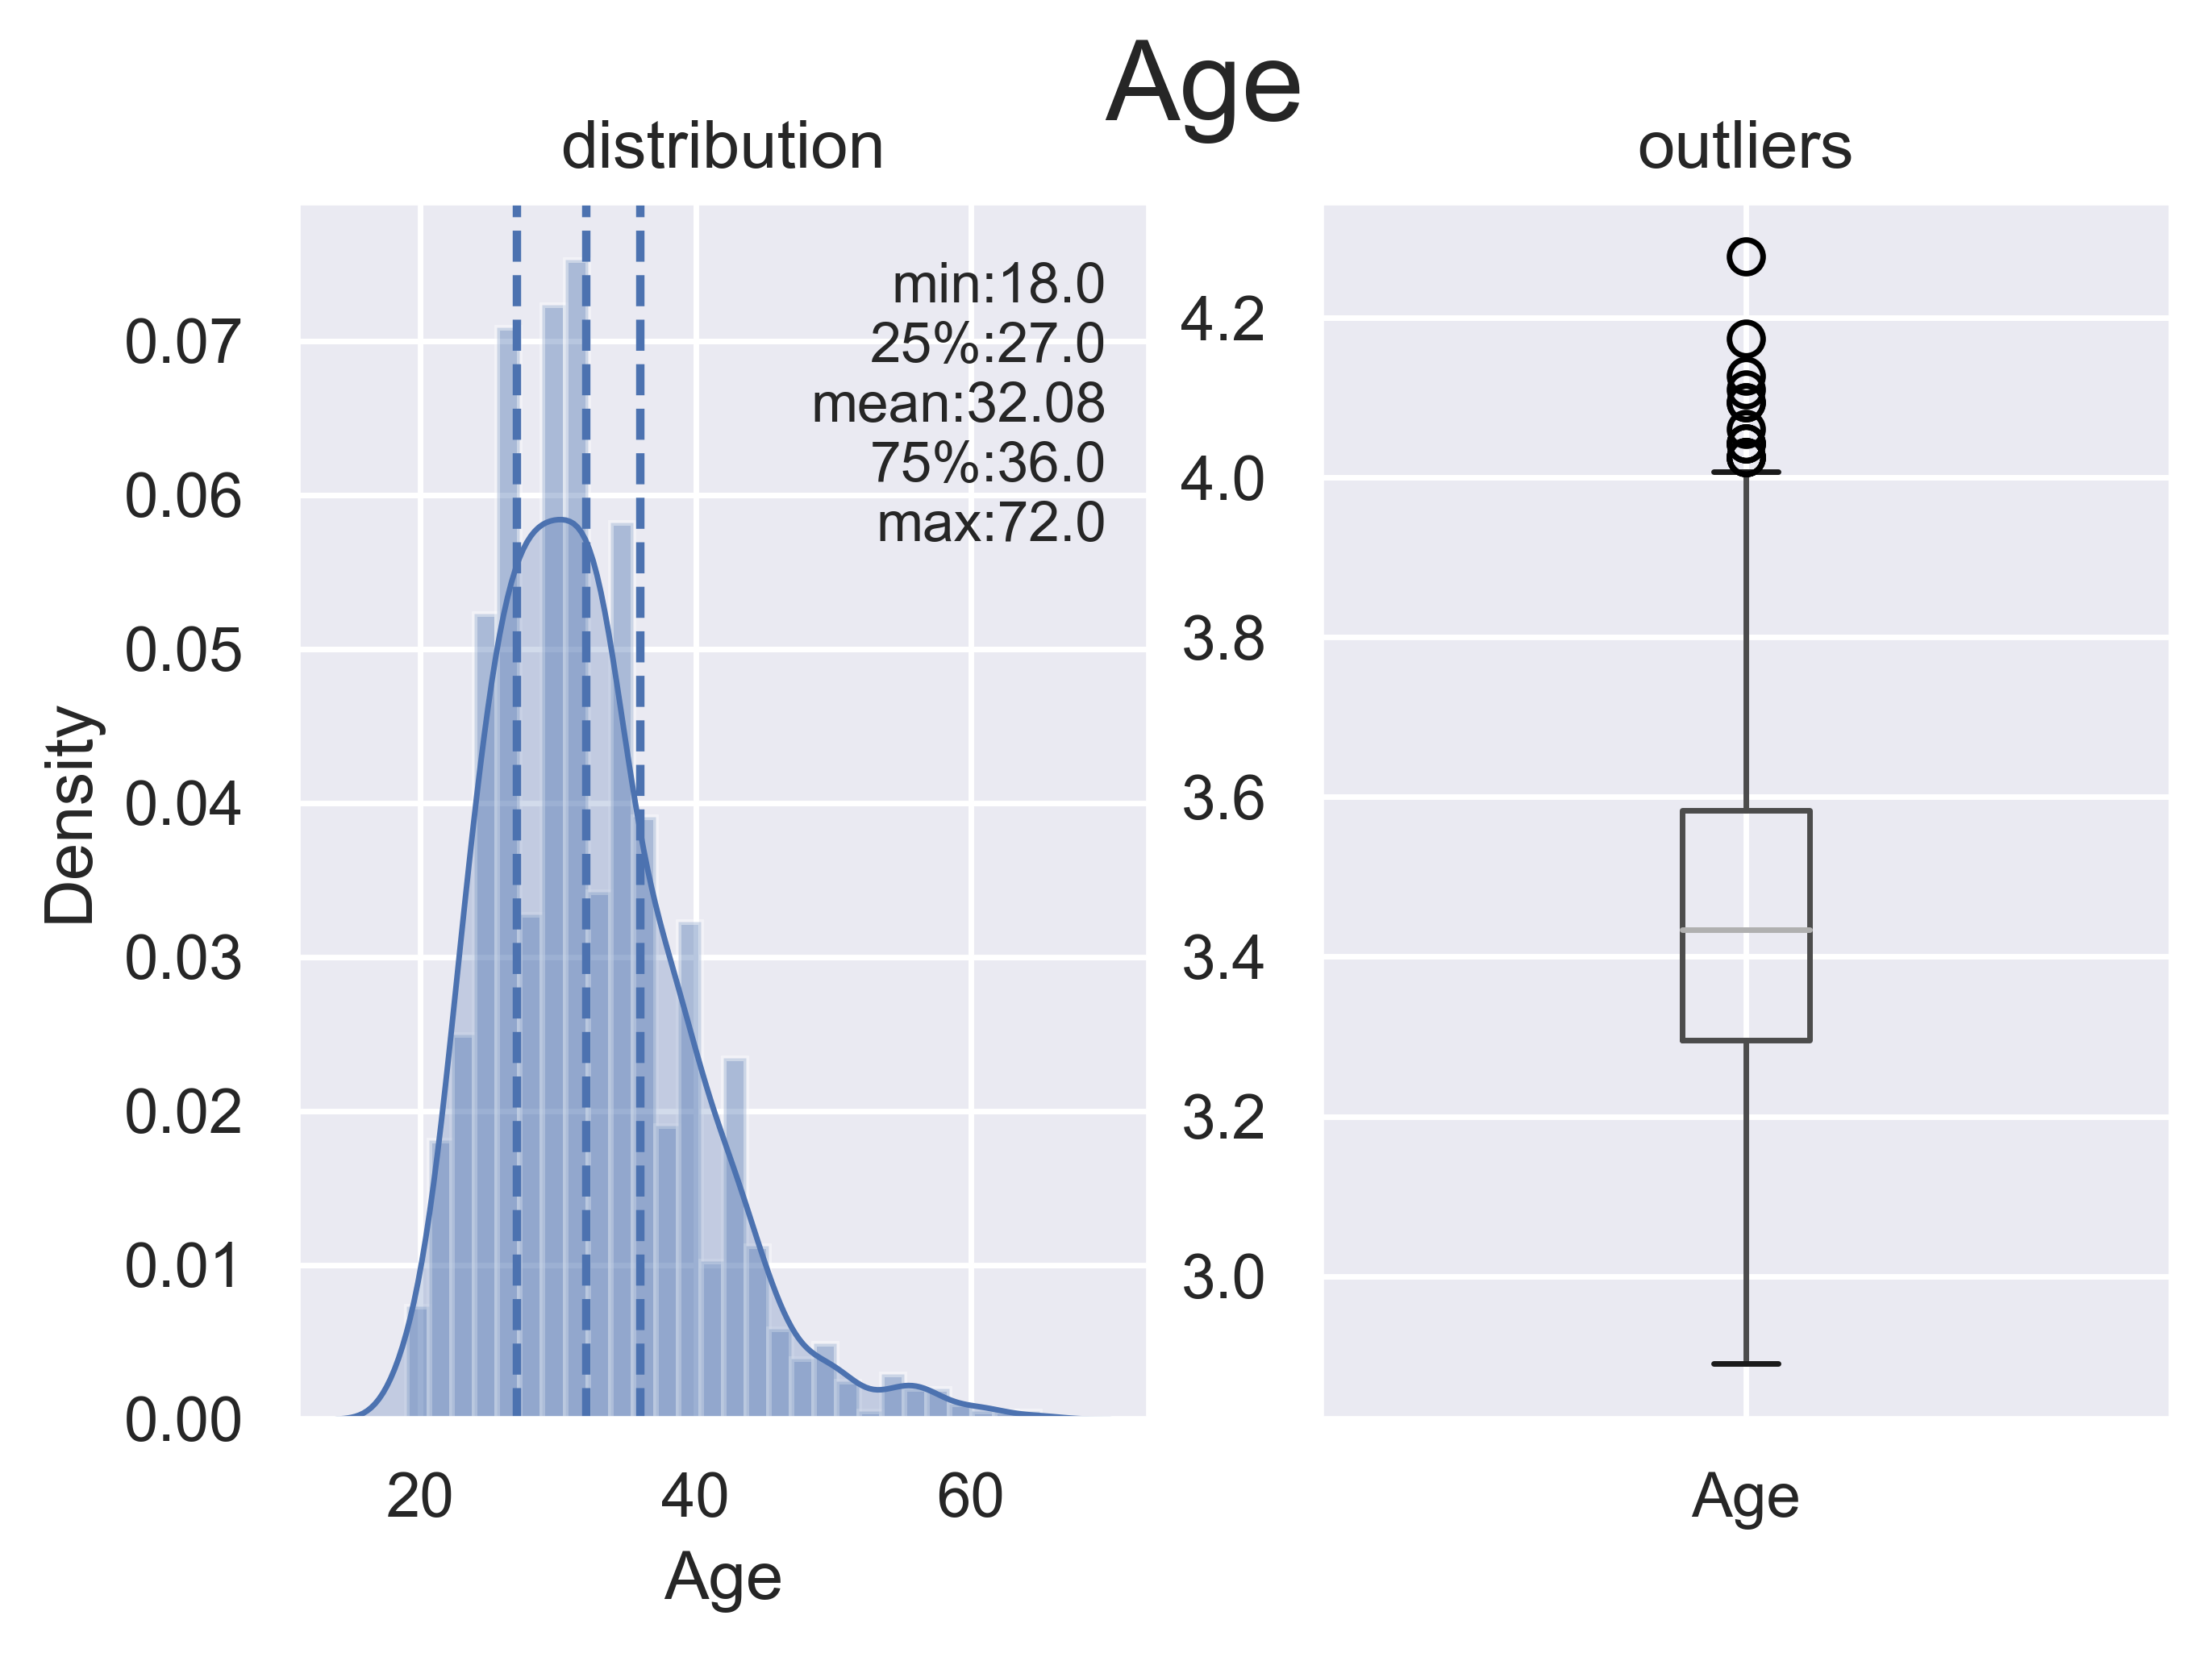

In [30]:
#funtion to make univariate distribution. Input is  column value
def univariateDistribution(x):
    des=data[x].describe()
    figure,axis = plt.subplots(nrows=1,ncols=2,dpi=500,sharex=False,sharey=False)
    figure.suptitle(x,fontsize=20)
    axis[0].title.set_text('distribution')
    variable=data[x].fillna(data[x].mean())
    breaks=np.quantile(variable, q=np.linspace(0,1,11))
    variable=variable[(variable>breaks[0]) & (variable<breaks[10])]
    
    #plot distplot
    sns.distplot(variable,hist=True,kde=True, kde_kws={"shade":True},ax=axis[0])

    #Segmentation lines
    axis[0].axvline(des.loc["25%"],ls='--')
    axis[0].axvline(des.loc["mean"],ls='--')
    axis[0].axvline(des.loc["75%"],ls='--')
    des=round(des,2).apply(lambda x : str(x))
    box='\n'.join(("min:"+des.loc["min"],"25%:"+des.loc["25%"],"mean:"+des.loc["mean"],"75%:"+des.loc["75%"],"max:"+des.loc["max"]))
    axis[0].text(0.95,0.95,box,transform=axis[0].transAxes,fontsize=10,va='top',ha="right") #more there

    ##boxplot
    axis[1].title.set_text('outliers')
    tmp_data=pd.DataFrame(data[x])
    tmp_data[x]=np.log(tmp_data[x])
    tmp_data.boxplot(column=x,ax=axis[1])
    plt.show()

#univariate distribution of age
univariateDistribution('Age')

#### Inference: 
There are outliers for Age

## Label Encoding:

It is an importance pre-processing step. It refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated.

In [31]:
#Encoding Data
labelDict = {}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

data.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['Female', 'Male', 'Trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_state ['AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', '

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,44,10,0,0,1,2,4,0,...,2,1,1,1,2,1,0,2,0,2
1,26,1,44,11,0,0,0,3,5,0,...,1,0,1,0,0,1,1,0,0,2
2,14,1,6,29,0,0,0,3,4,0,...,0,1,1,2,2,2,2,1,0,2
3,13,1,43,29,0,1,1,2,2,0,...,0,2,2,1,0,0,0,1,1,2
4,13,1,44,38,0,0,0,1,1,1,...,1,1,1,1,2,2,2,0,0,2


In [32]:
#printing the data to see if there is missing data
overall = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missingData = pd.concat([overall, percent], axis=1, keys=['Overall', 'Percent'])
missingData.head(20)
print(missingData)

                           Overall  Percent
Age                              0      0.0
Gender                           0      0.0
obs_consequence                  0      0.0
mental_vs_physical               0      0.0
phys_health_interview            0      0.0
mental_health_interview          0      0.0
supervisor                       0      0.0
coworkers                        0      0.0
phys_health_consequence          0      0.0
mental_health_consequence        0      0.0
leave                            0      0.0
anonymity                        0      0.0
seek_help                        0      0.0
wellness_program                 0      0.0
care_options                     0      0.0
benefits                         0      0.0
tech_company                     0      0.0
remote_work                      0      0.0
no_employees                     0      0.0
work_interfere                   0      0.0
treatment                        0      0.0
family_history                  

In [33]:
#unique value count in features
data.nunique()

Age                          45
Gender                        3
Country                      47
state                        46
self_employed                 2
family_history                2
treatment                     2
work_interfere                5
no_employees                  6
remote_work                   2
tech_company                  2
benefits                      3
care_options                  3
wellness_program              3
seek_help                     3
anonymity                     3
leave                         3
mental_health_consequence     3
phys_health_consequence       3
coworkers                     3
supervisor                    3
mental_health_interview       3
phys_health_interview         3
mental_vs_physical            3
obs_consequence               2
age_range                     4
dtype: int64

### Check whether data should be categorised or has too many numeric values

In [34]:
#checking if the features are numberical/categorical
def checkTypeOfData(data, column, maximumUniqueValues=20):
    #if(data[column].dtype=="0") | (data[column].nunique() < maximumUniqueValues):
    if(data[column].nunique() < maximumUniqueValues):
        return "categorical";
    else:
        return "numerical";
types= {col : checkTypeOfData(data,col, 20)for col in data.columns}
types    

{'Age': 'numerical',
 'Gender': 'categorical',
 'Country': 'numerical',
 'state': 'numerical',
 'self_employed': 'categorical',
 'family_history': 'categorical',
 'treatment': 'categorical',
 'work_interfere': 'categorical',
 'no_employees': 'categorical',
 'remote_work': 'categorical',
 'tech_company': 'categorical',
 'benefits': 'categorical',
 'care_options': 'categorical',
 'wellness_program': 'categorical',
 'seek_help': 'categorical',
 'anonymity': 'categorical',
 'leave': 'categorical',
 'mental_health_consequence': 'categorical',
 'phys_health_consequence': 'categorical',
 'coworkers': 'categorical',
 'supervisor': 'categorical',
 'mental_health_interview': 'categorical',
 'phys_health_interview': 'categorical',
 'mental_vs_physical': 'categorical',
 'obs_consequence': 'categorical',
 'age_range': 'categorical'}

## Univariate Distributions

To check distribution of data in columns

/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


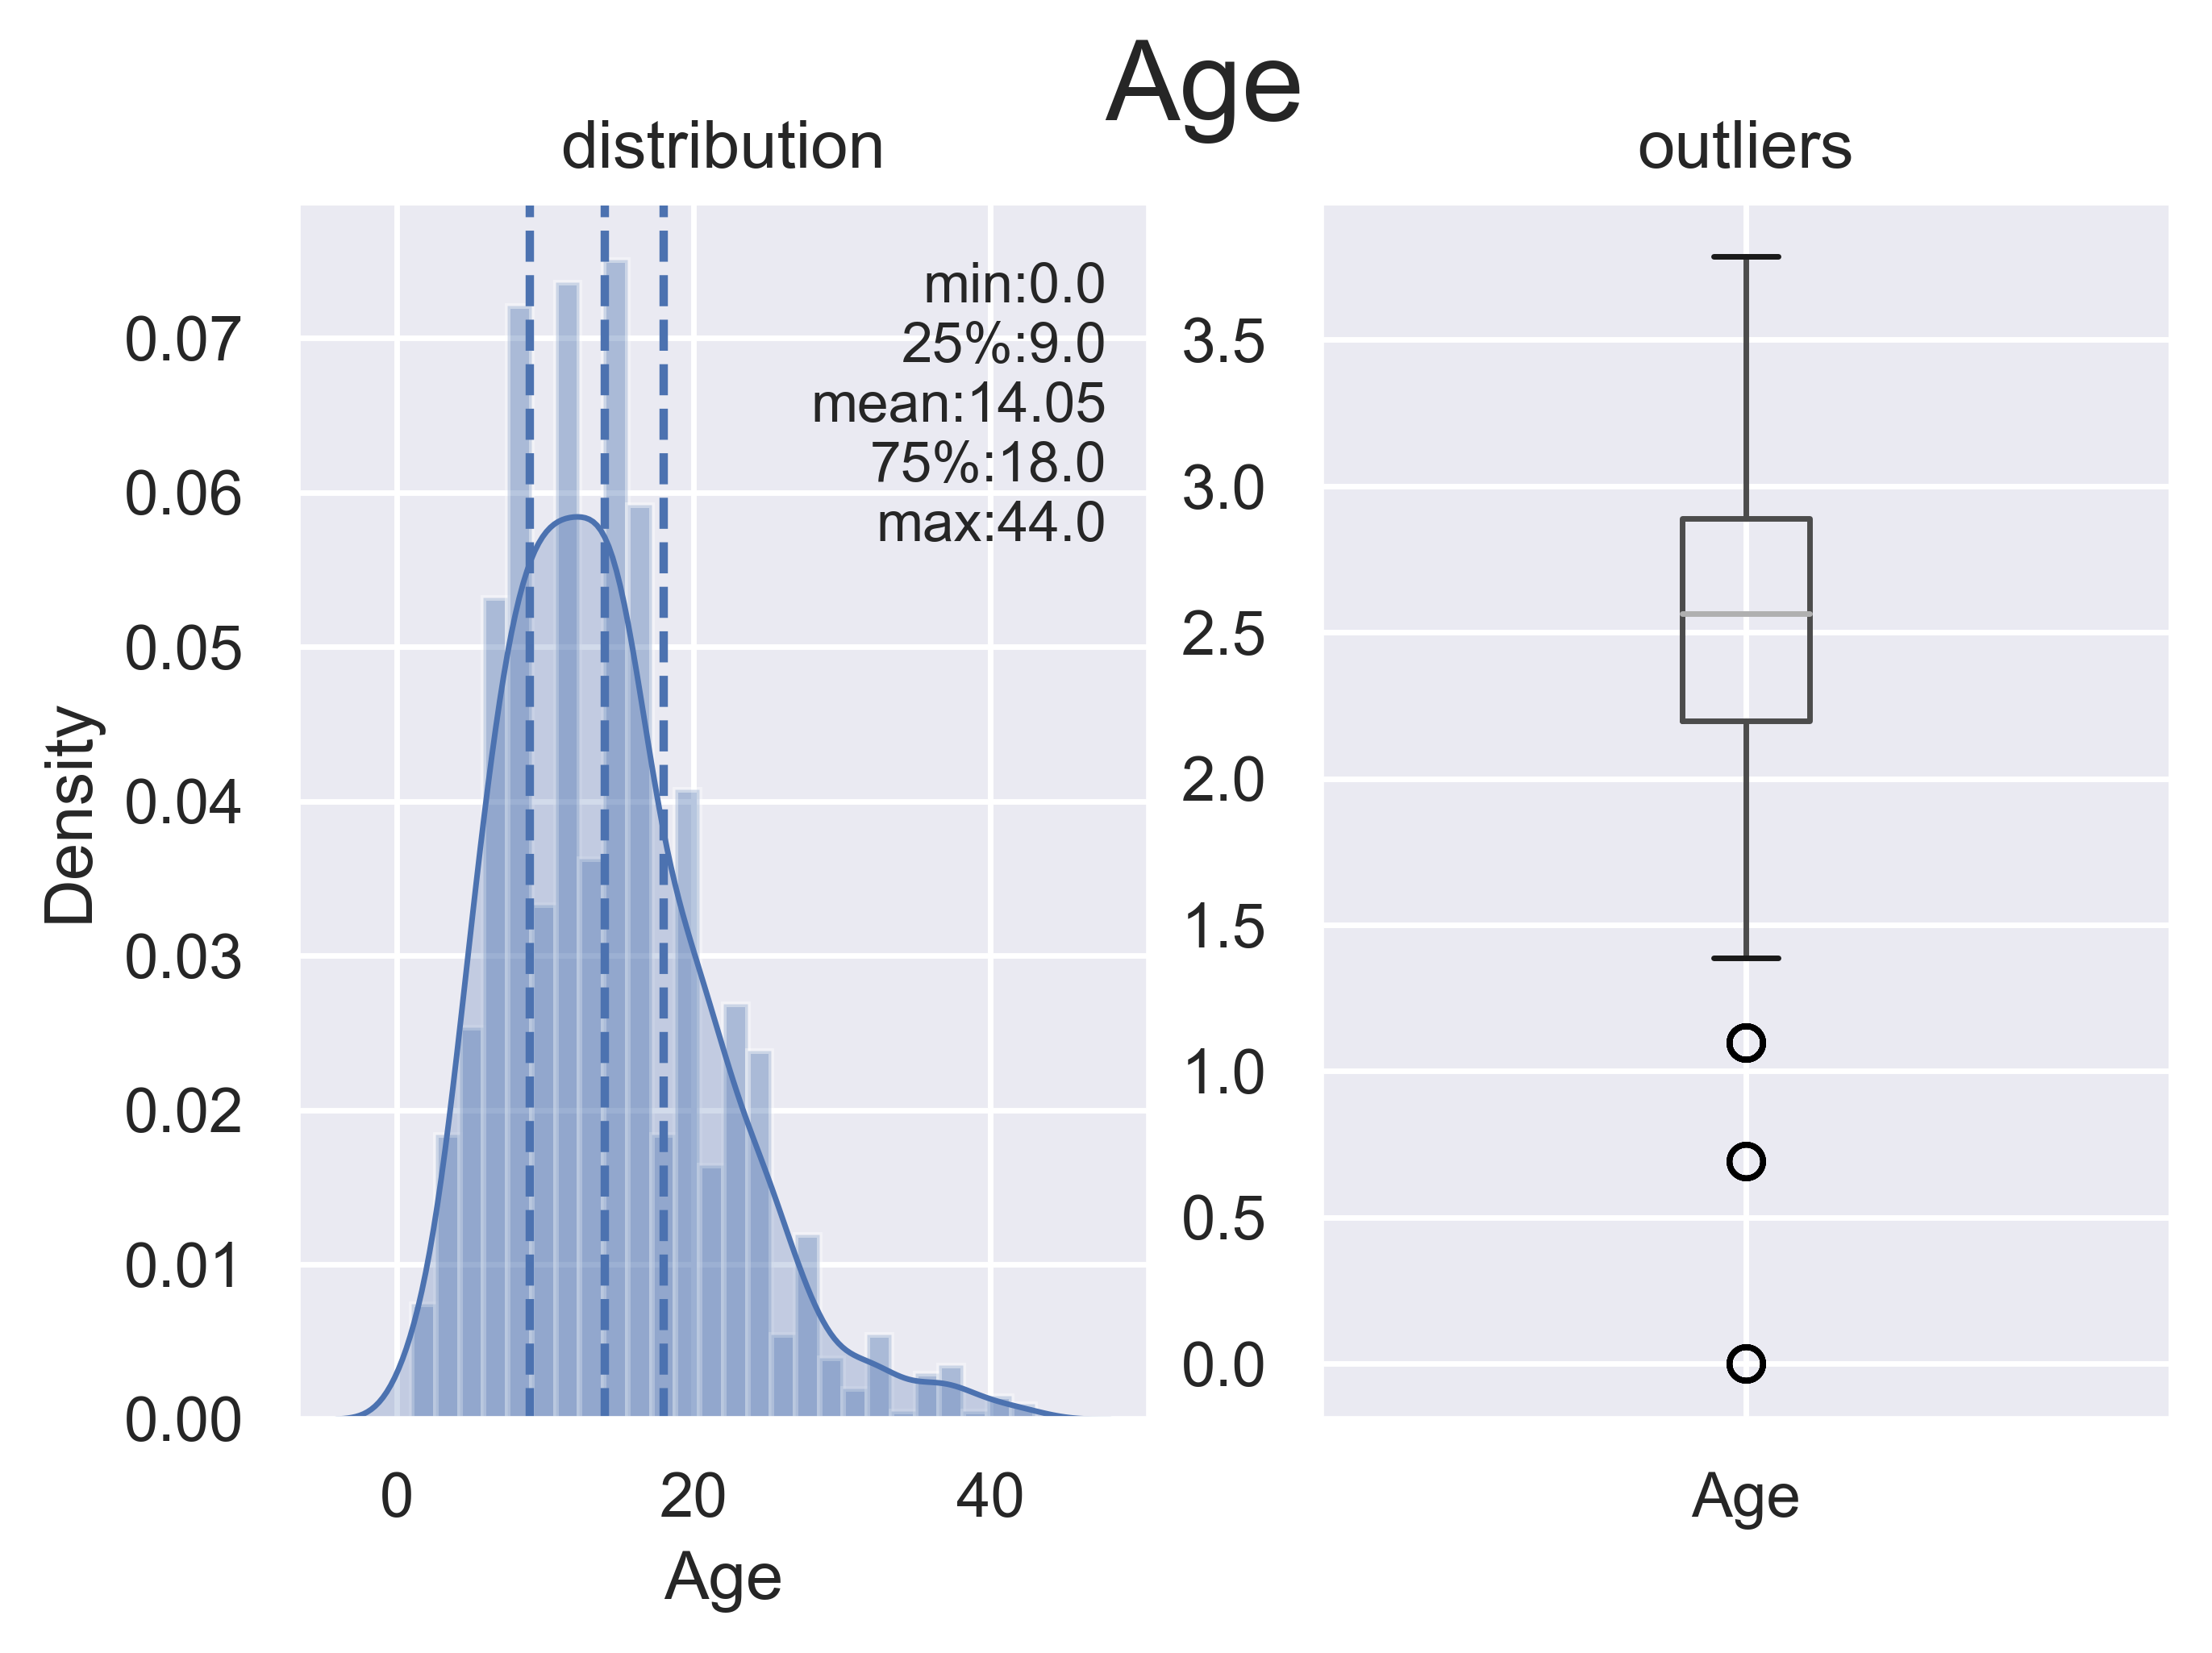

/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


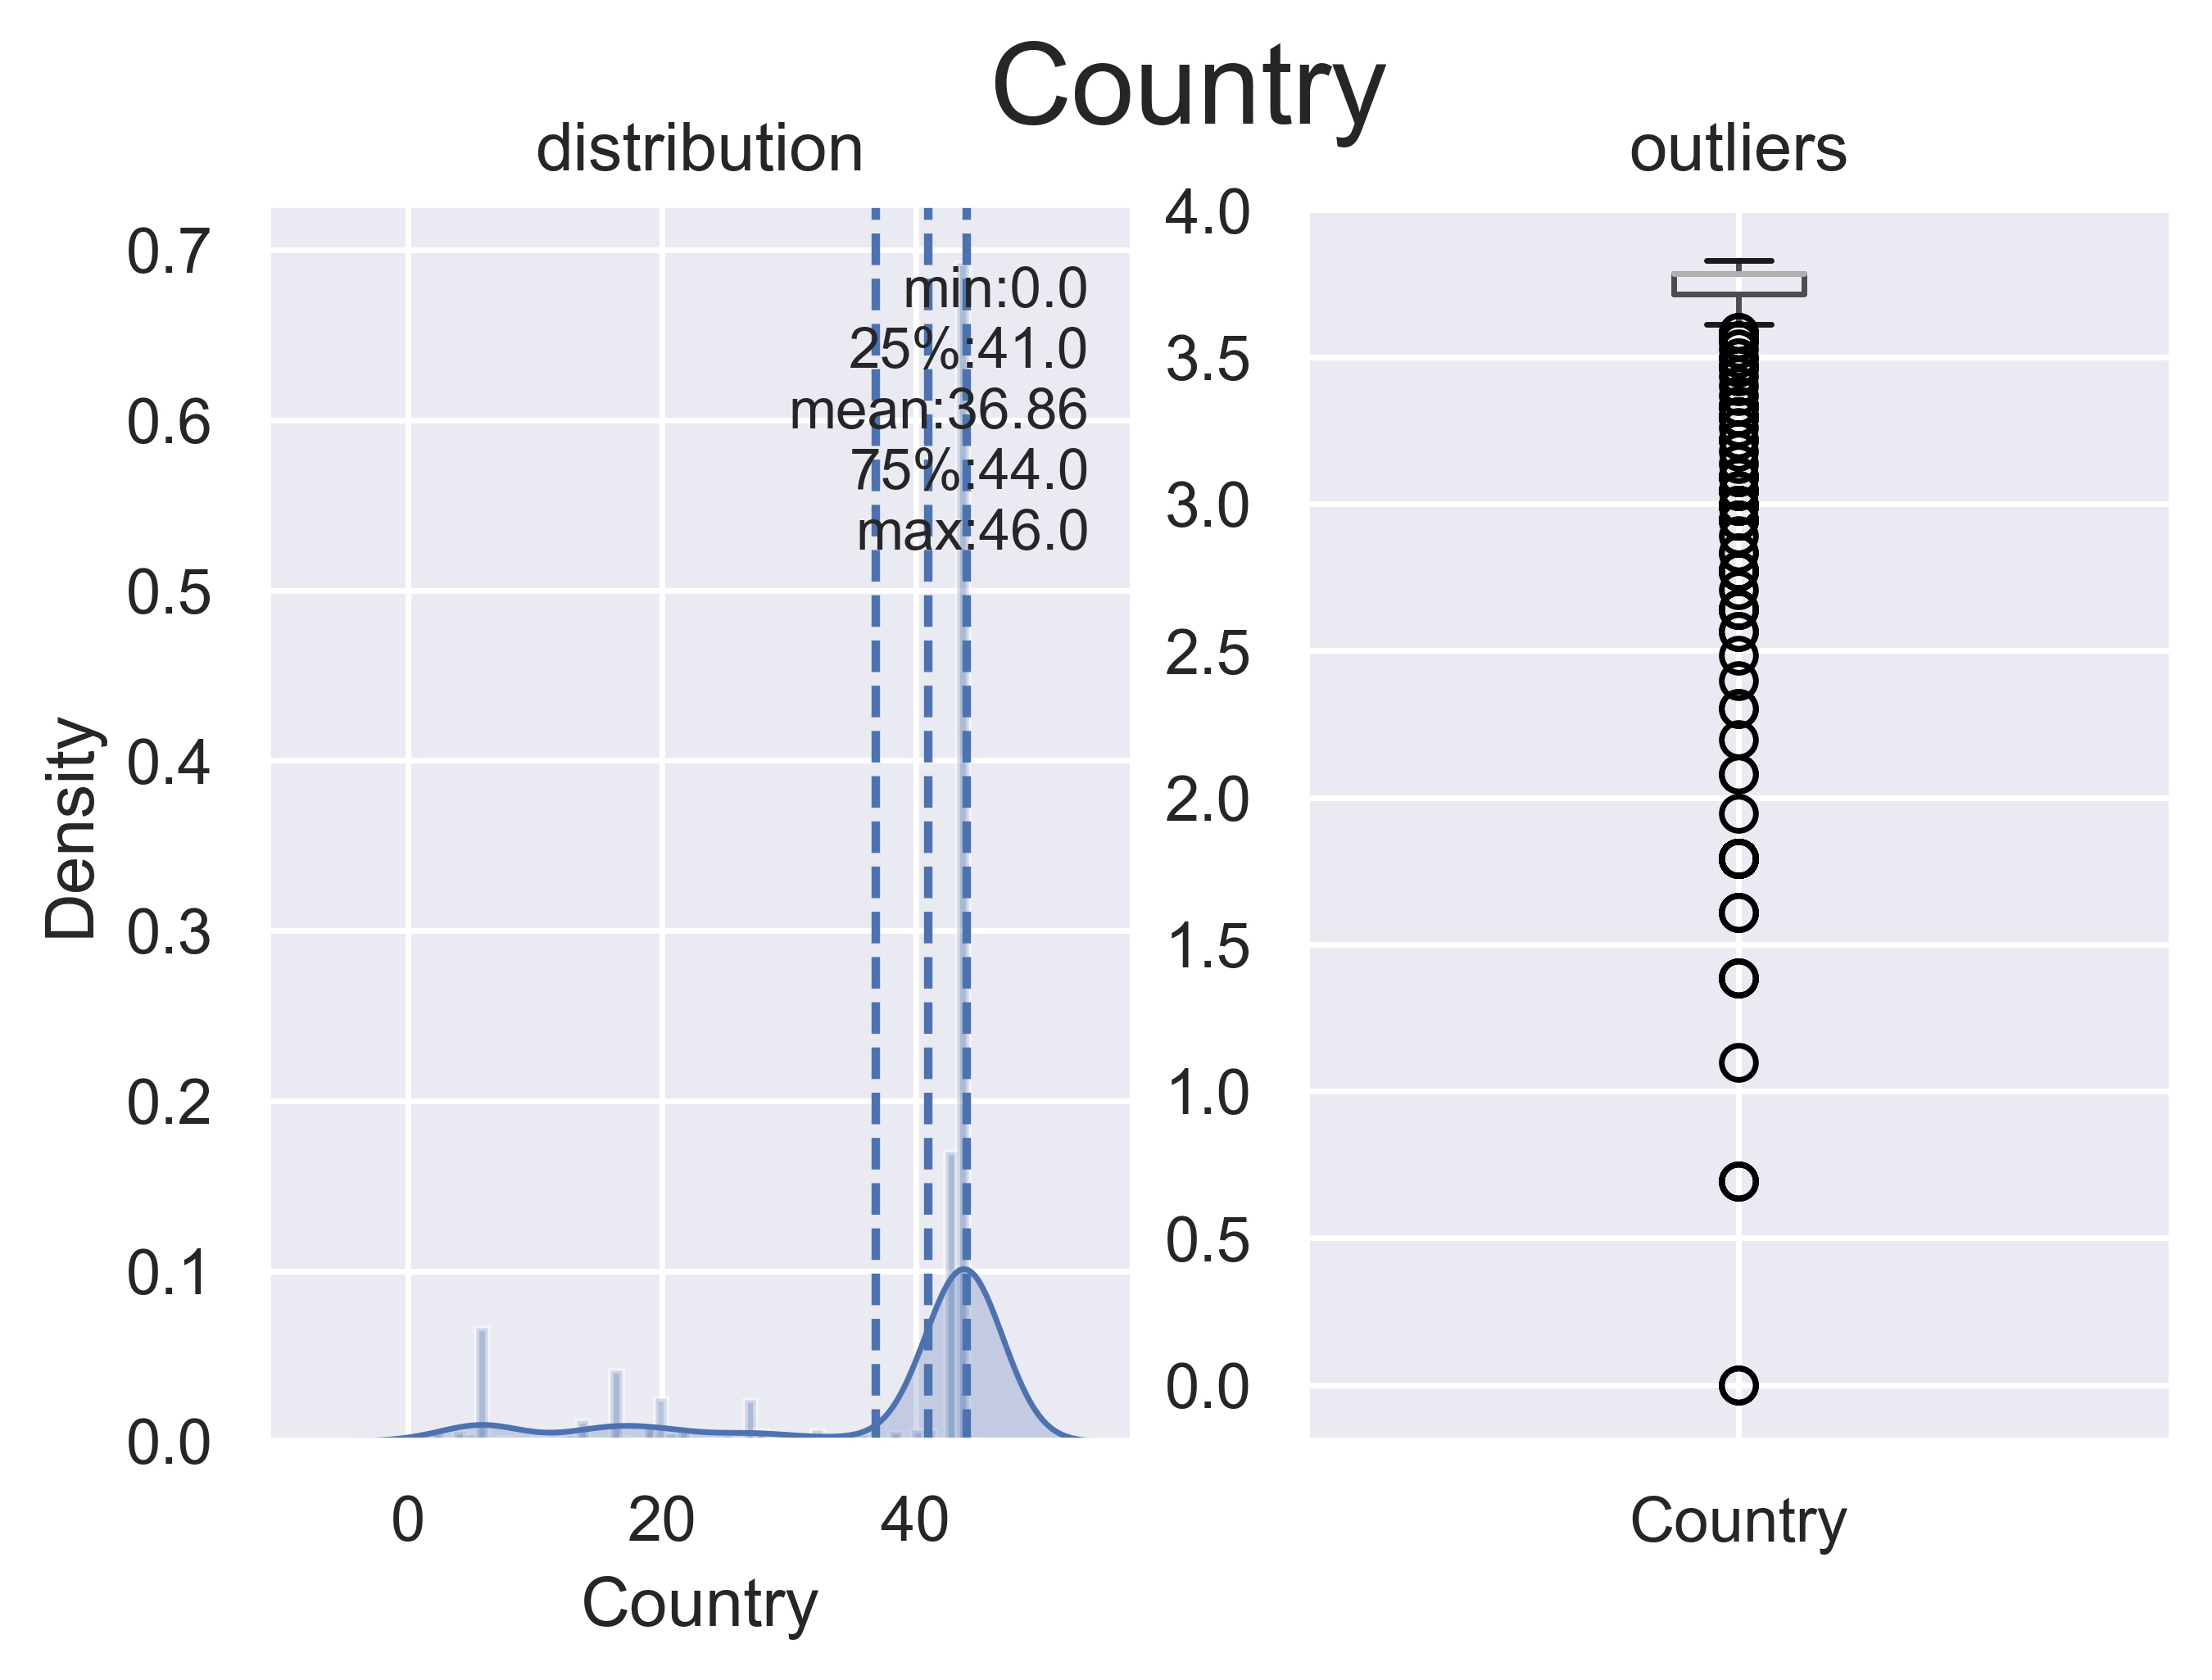

/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


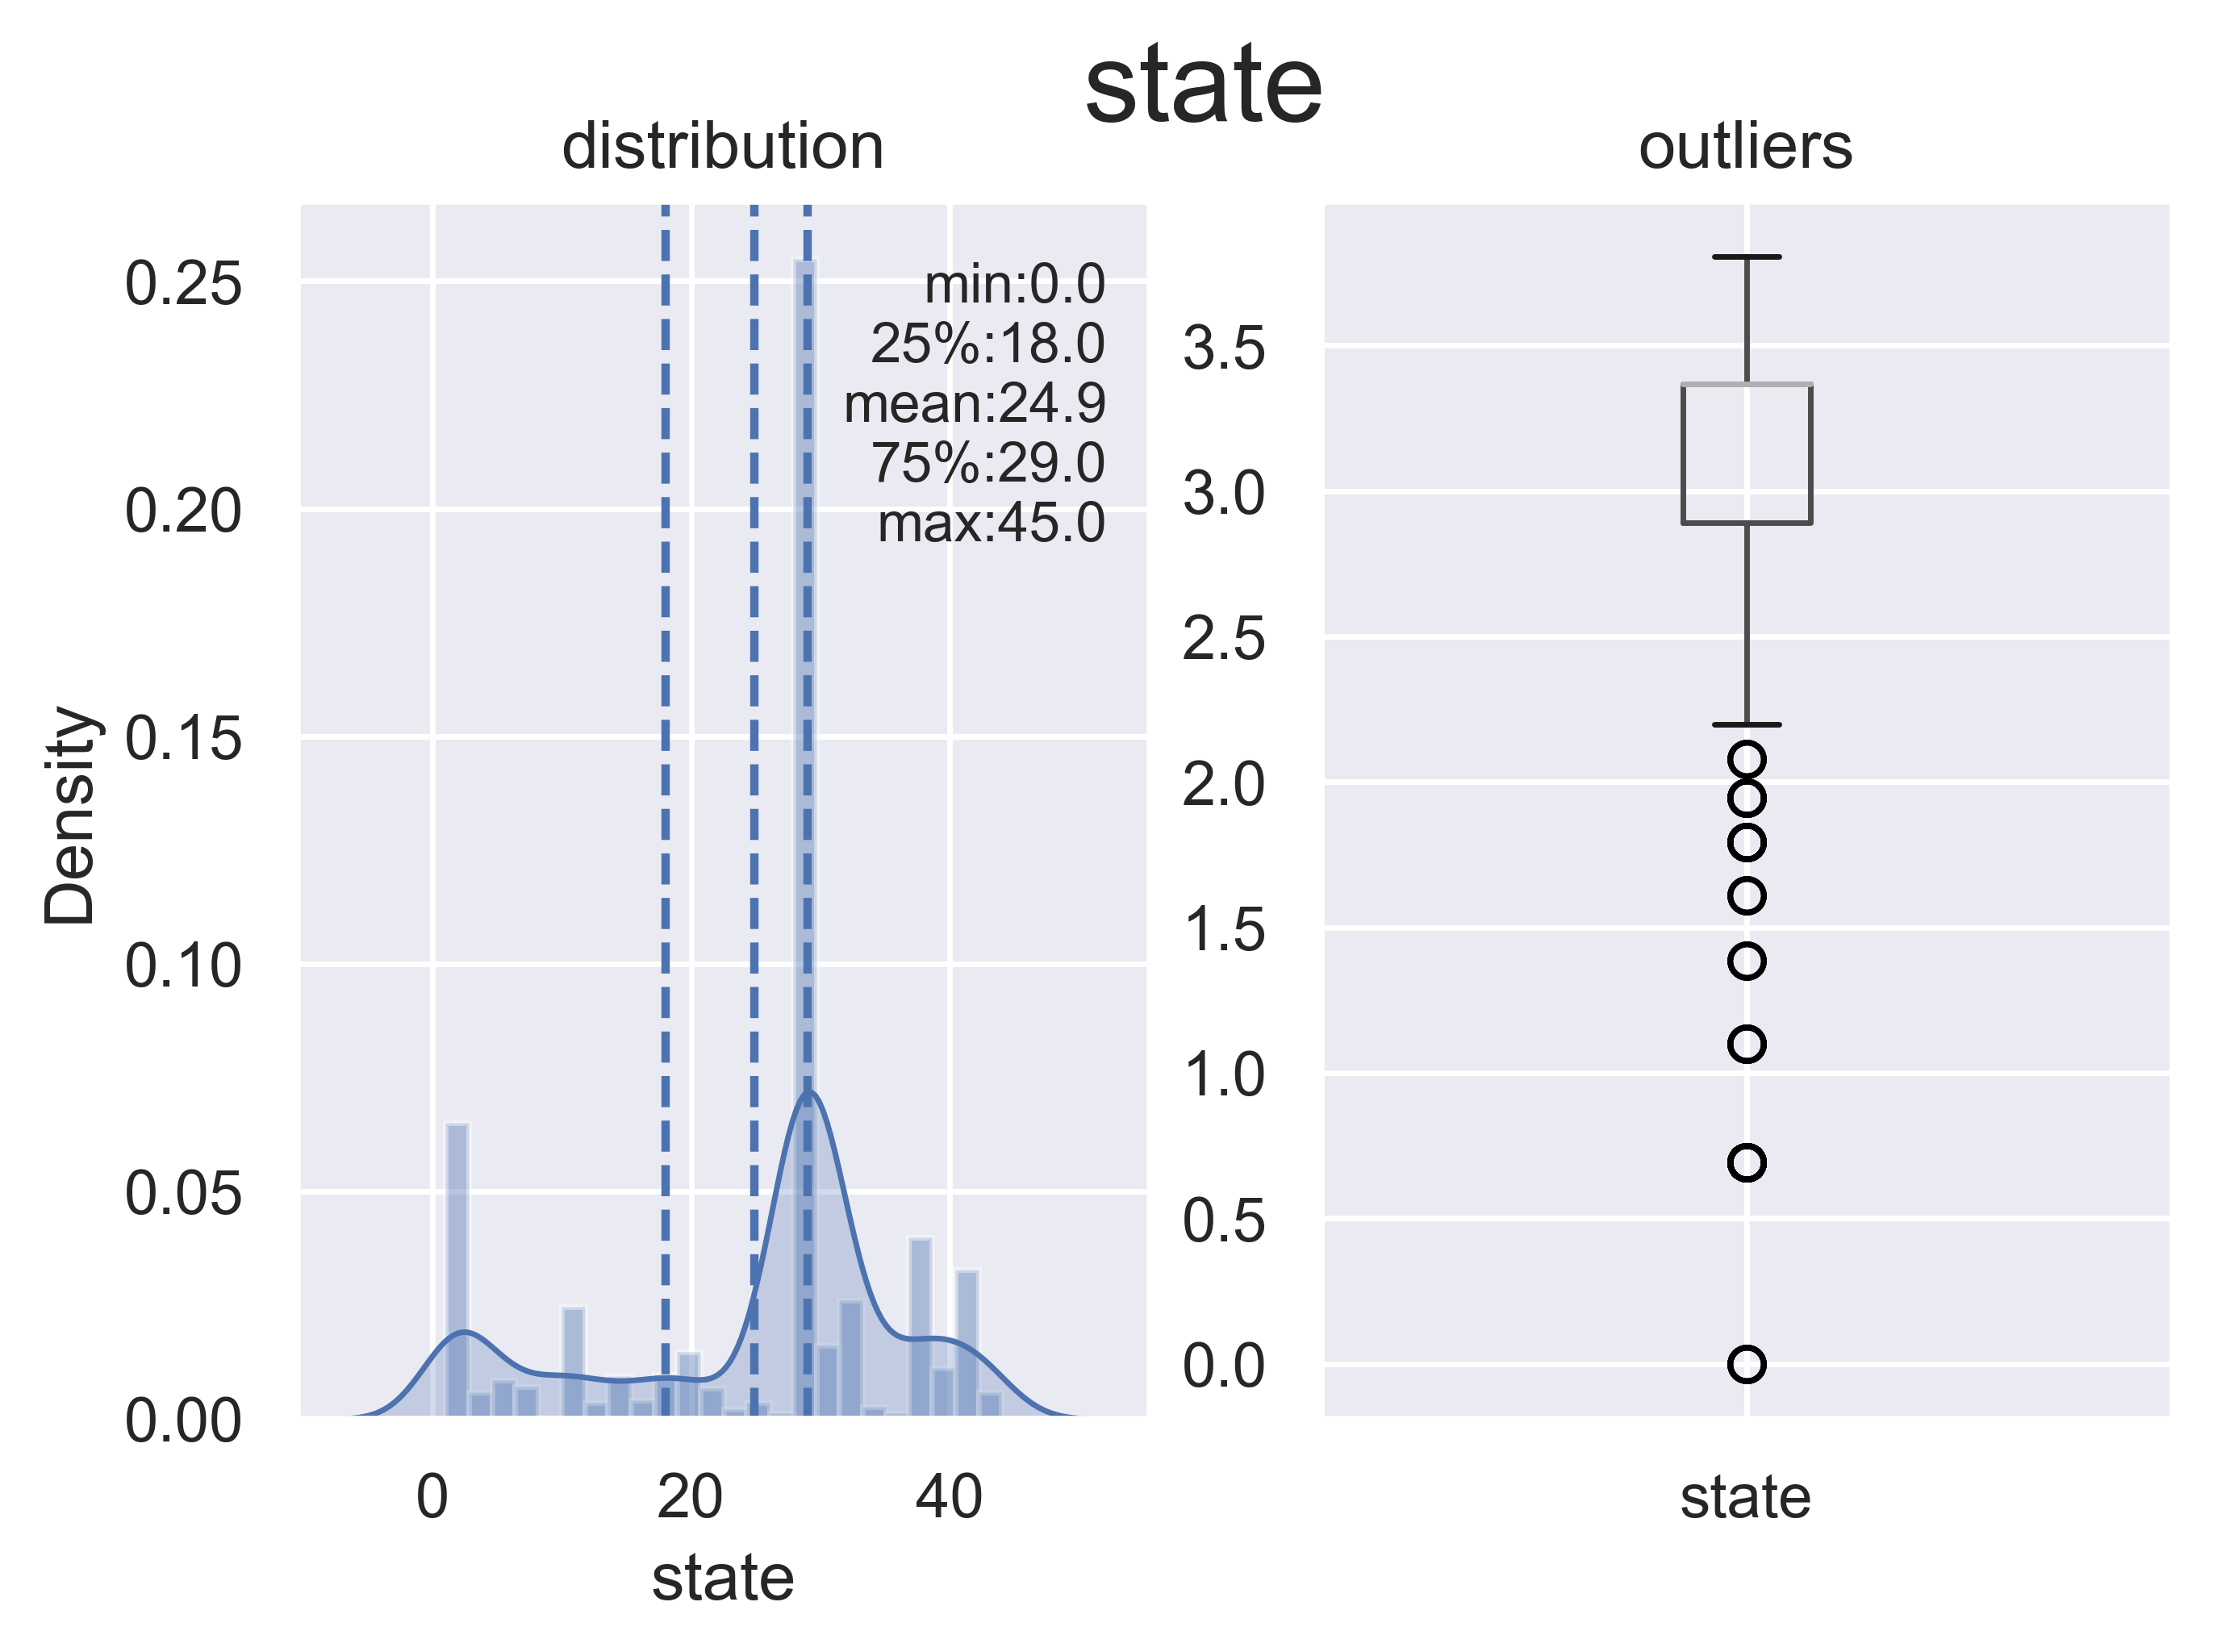

In [35]:
#univariate distribution of numerical columns
for x,y in types.items():
    if y=="numerical":
        univariateDistribution(x)

## Outlier treatment

In [36]:
#function to drop outliers
def drop_outliers(df,outliers):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    not_outliers=df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    outliers_dropped = outliers.dropna().reset_index()
    return not_outliers

#function to find outliers
def find_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers=df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

#find outliers in Age
outliers=find_outliers(data['Age'])

len(outliers)

32

In [37]:
#outliers index
print(outliers.index)

Int64Index([  38,  294,  297,  347,  372,  419,  466,  471,  475,  498,  520,
             527,  560,  574,  581,  606,  631,  643,  652,  856,  870,  895,
             898,  904,  911,  952,  964, 1106, 1159, 1182, 1186, 1236],
           dtype='int64')


In [38]:
#drop outliers in data
data=data.drop(outliers.index)
print(len(data))

1221


## Bivariate Analysis

Let's find distribution data in features with respect to treatment

In [39]:
#function to plot bivariate analysis
def bivariateAnalysis():
    figure,axis=plt.show()
    axis.title.set_text('bins')

### Bivariate analysis of Age and Treatment to check for patterns

/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


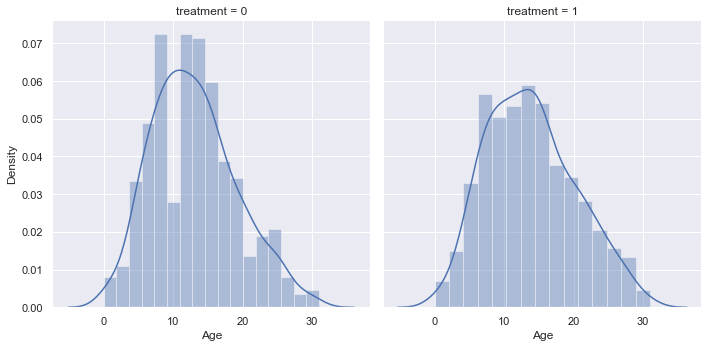

In [40]:
#bivariate analysis of age and treatment to check for patterns
g=sns.FacetGrid(data, col="treatment",size=5)
g=g.map(sns.distplot,"Age")

### Correlationmatrix to find linear relation between all variables

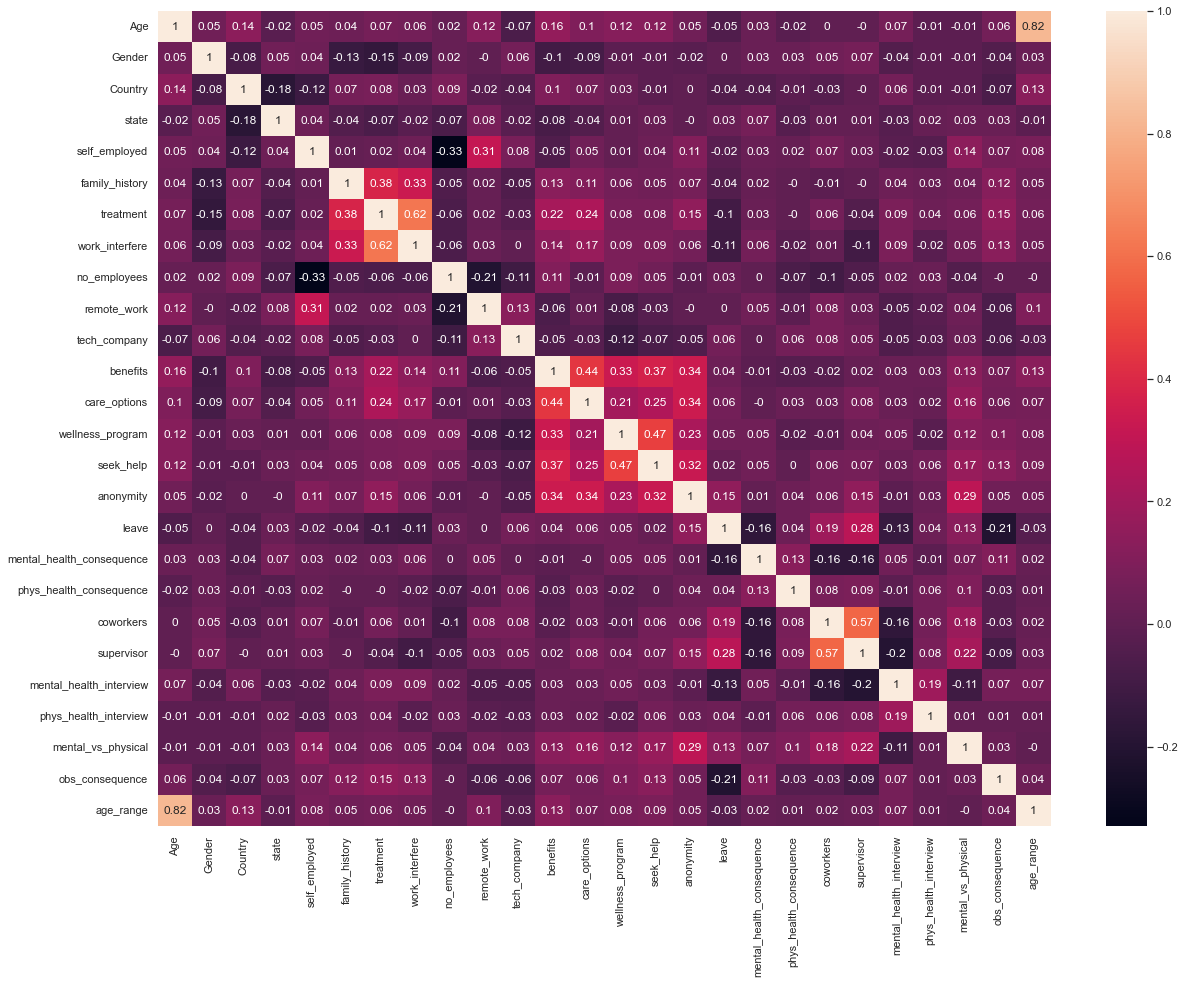

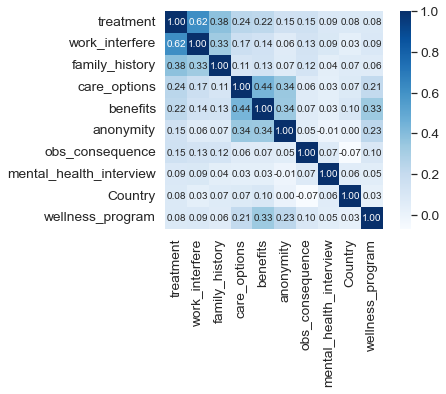

In [41]:
#correlationmatrix to find linear relation between all variables
corrmatrix = data.corr().round(2)
fig = plt.subplots(figsize = (20, 15))

sns.heatmap(corrmatrix, annot = True);
plt.show()

#correlation Matrix for treatment
k = 10          #Number of variables
columns = corrmatrix.nlargest(k,'treatment')['treatment'].index
x = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.25)
heatmap = sns.heatmap(x, cmap="Blues", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size' : 10}, yticklabels = columns.values, xticklabels = columns.values)

plt.show()

#### Inference: 
We could see that work_interference is highly correlated with treatment, co workers and supervisor are highly correlated

## Scaling and Fitting

### Scaling

In [42]:
#Features Scaling
s = MinMaxScaler()
data['Age'] = s.fit_transform(data[['Age']])
data.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.612903,0,44,10,0,0,1,2,4,0,...,2,1,1,1,2,1,0,2,0,2
1,0.838710,1,44,11,0,0,0,3,5,0,...,1,0,1,0,0,1,1,0,0,2
2,0.451613,1,6,29,0,0,0,3,4,0,...,0,1,1,2,2,2,2,1,0,2
3,0.419355,1,43,29,0,1,1,2,2,0,...,0,2,2,1,0,0,0,1,1,2
4,0.419355,1,44,38,0,0,0,1,1,1,...,1,1,1,1,2,2,2,0,0,2


## Model Training
Target feature: Treatment

### Predictors: all features

#### Function to split data

#### Input parameters: 
X : predictor featureset
Y: target feature data

#### Output parameters:
train and test data



In [43]:
#Splitting the dataset
def splitData(X,Y):

    # split X and Y into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=4)

    #Create dictionaries for final graph 
    methodDict = {}
    rmseDict =()
    return [X_train, X_test, Y_train, Y_test]

#### function to train and test model 

#### Input parameters:
model name, model,train and test data for predictors and treatment features

#### Output: 
Y_pred : predicted value for model

In [44]:
from sklearn.metrics import classification_report
def trainAndTest(model, name,X_train, X_test, Y_train,Y_test):
    # Fit the model
    model.fit(X_train, Y_train)
    #predict the values
    Y_pred=model.predict(X_test)
    #if (name =='SVM'):
    # global Y_pred_SVM
    # Y_pred_SVM=Y_pred
    global model_SVM
    model_SVM=model
    #get precision,recall, accuracy values
    test_report= classification_report(Y_test,Y_pred)
    updateScore(name, Y_test, Y_pred)
    return Y_pred

#### Function to get metrics of model
#### Metrics:
Accuracy, AUC, Precision, Recall, Accuracy, F1

#### Output
Scores

In [45]:
#Function to get metrics of model
scores=pd.DataFrame(columns=['Model','AUC','Precision','Recall','Accuracy','F1'])

def updateScore(name, Y_test, Y_pred):
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
    global scores
    scores=scores.append({'Model': name,    
                         'AUC': round(roc_auc_score(Y_test,Y_pred),4),
                         'Precision' : metrics.precision_score(Y_test,Y_pred),
                         'Recall':metrics.recall_score(Y_test,Y_pred),
                         'Accuracy': metrics.accuracy_score(Y_test,Y_pred),
                         'F1': metrics.f1_score(Y_test,Y_pred)
                         },
                        ignore_index=True)
    
    
    return (scores)

#### Function to plot ROC curve

#### Input: 
Test data for target vale and predicted value
#### Output
ROC curve with AUC score

In [46]:
#function to plot the ROC curve and print the ROC-AUC score
def plot_roc(Y_test, Y_pred):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

   # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    
    plt.title('ROC Curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(Y_test, Y_pred),4)))

    # plot the grid
    plt.grid(True)

### Prediction of treatment with all the features using different Models

In [47]:
#model list
models={'Random Forest': RandomForestClassifier(n_estimators=10,random_state=42, n_jobs=-1),
        'Decision Tree' :DecisionTreeClassifier(random_state=42),
        'KNN' : KNeighborsClassifier(n_neighbors=10),
        'SVM': SVC(kernel='linear')
       }
#feature list
columnFeatures =['Age','Gender','family_history','Country','work_interfere','benefits','care_options','no_employees','anonymity','leave','wellness_program','seek_help',
                  'mental_health_consequence','coworkers','supervisor','obs_consequence','mental_health_interview','mental_vs_physical','phys_health_consequence','phys_health_interview']
X = data[columnFeatures]
Y = data.treatment   

X_train, X_test, Y_train, Y_test=splitData(X,Y)


for name,model in models.items():
    Y_pred=trainAndTest(model, name, X_train, X_test, Y_train,Y_test)
    global Y_pred_SVM
    Y_pred_SVM=Y_pred

scores

/var/folders/n0/cnv_hxcs0c1bs51vz986xl1h0000gn/T/ipykernel_97060/1044519682.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append({'Model': name,
/var/folders/n0/cnv_hxcs0c1bs51vz986xl1h0000gn/T/ipykernel_97060/1044519682.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append({'Model': name,
/var/folders/n0/cnv_hxcs0c1bs51vz986xl1h0000gn/T/ipykernel_97060/1044519682.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append({'Model': name,
/var/folders/n0/cnv_hxcs0c1bs51vz986xl1h0000gn/T/ipykernel_97060/1044519682.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append(

,Model,AUC,Precision,Recall,Accuracy,F1
0,Random Forest,0.7892,0.808824,0.814815,0.791837,0.811808
1,Decision Tree,0.7175,0.753846,0.725926,0.718367,0.739623
2,KNN,0.7678,0.804688,0.762963,0.767347,0.78327
3,SVM,0.7887,0.789116,0.859259,0.795918,0.822695


#### Inference
SVM model gave high accuracy. Let's plot confusion matrix for SVM model

### Confusion matrix 

Confusion Matrix : 


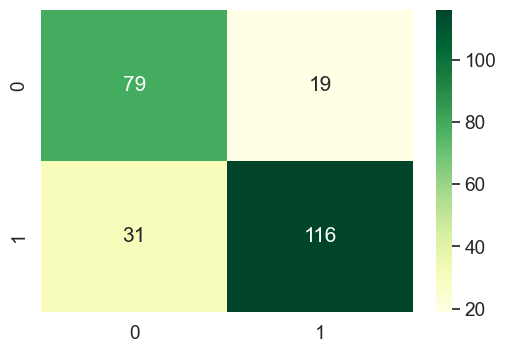

In [48]:
#confusion matrix with all features for SVM
cm = confusion_matrix(Y_pred, Y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
plt.figure(dpi=100)
sns.heatmap(cm, cmap = 'YlGn',annot = True, fmt='d')
plt.show()

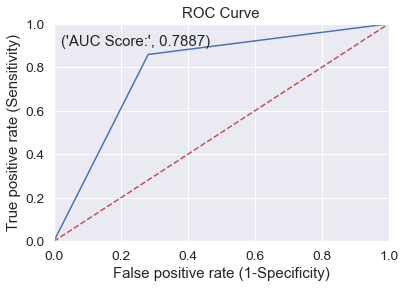

In [49]:
#ROC curve for SVM with all features
plot_roc(Y_test, Y_pred)

## Model Tuning:

### Feature Selection



#### Function to find important features with svm coefficients:

The function returns features in order of their importance based on the svm coefficients.

In [50]:
#svm coeff features
import collections
import operator
def svmImpfeatures(model, features_names):
    feature_importance = {}
    for feature in zip(features_names,model.coef_[0]):
        feature_importance[feature[0]]=abs(feature[1])
    items=dict(sorted(feature_importance.items(), key=operator.itemgetter(1),reverse=True))
    plt.figure(figsize=(50,8))
    plt.bar(items.keys(),items.values(),color='blue',width=0.4)
    
    plt.xlabel("SVM-Feature importance")
    plt.show()
    return items
     


#### Function to find important features with Chi-square test

It examines the correlation between the variables which do not contain the continuous data

In [51]:
#chi-2 test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Two features with highest chi-squared statistics are selected
def chi2Importance(X,Y):
    chi2_features = SelectKBest(chi2, k = 10)
    X_kbest_features = chi2_features.fit_transform(X, Y)

    feature_importance = {}
    for feature in zip(X.columns,chi2_features.scores_):
        feature_importance[feature[0]]=feature[1]
    items=dict(sorted(feature_importance.items(), key=operator.itemgetter(1),reverse=True))
    plt.figure(figsize=(50,8))
    plt.bar(items.keys(),items.values(),color='blue',width=0.4)
    plt.xlabel("Chi2 -Feature importance")
    plt.show()
    return items


#### Comparing important features based off of svm coefficients and Chi-Square test


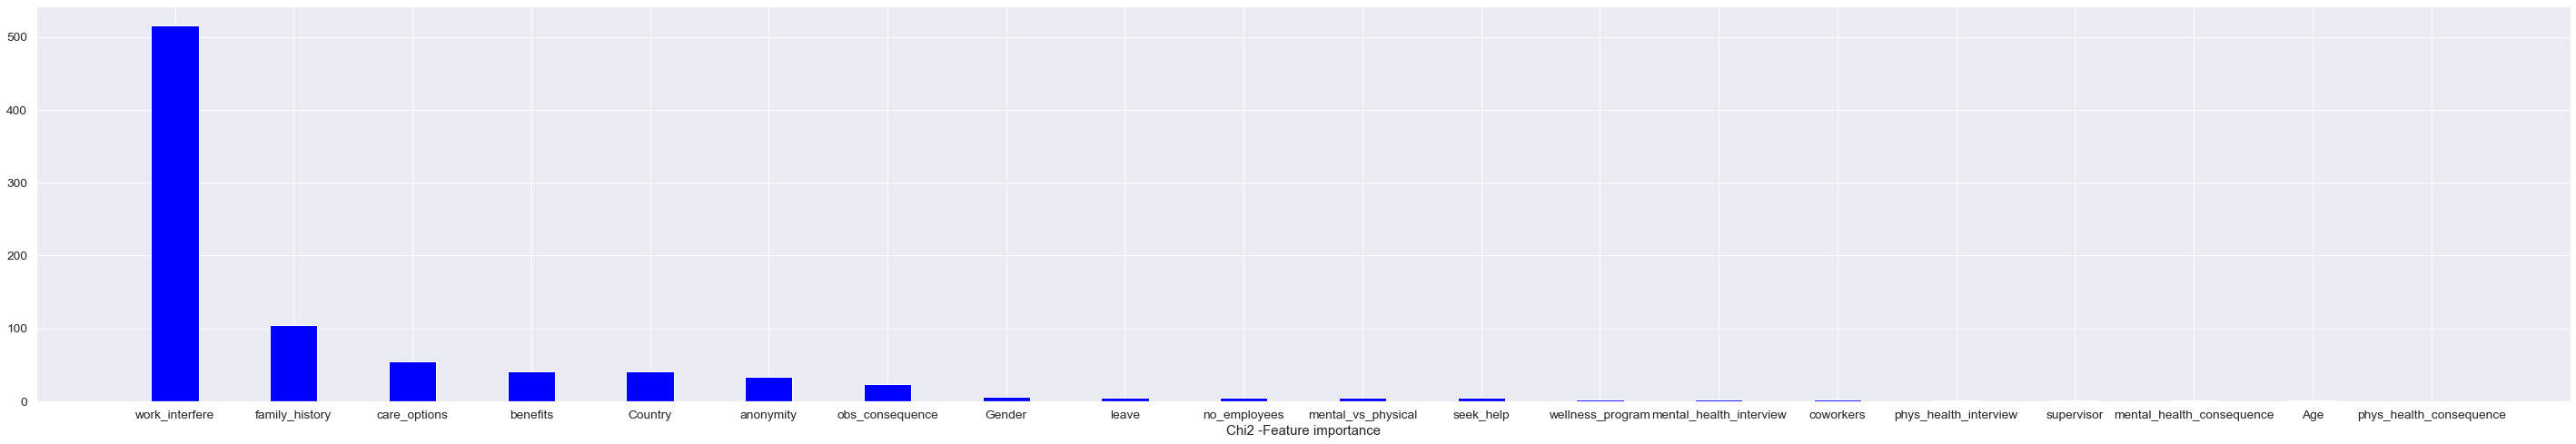

/var/folders/n0/cnv_hxcs0c1bs51vz986xl1h0000gn/T/ipykernel_97060/1044519682.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append({'Model': name,


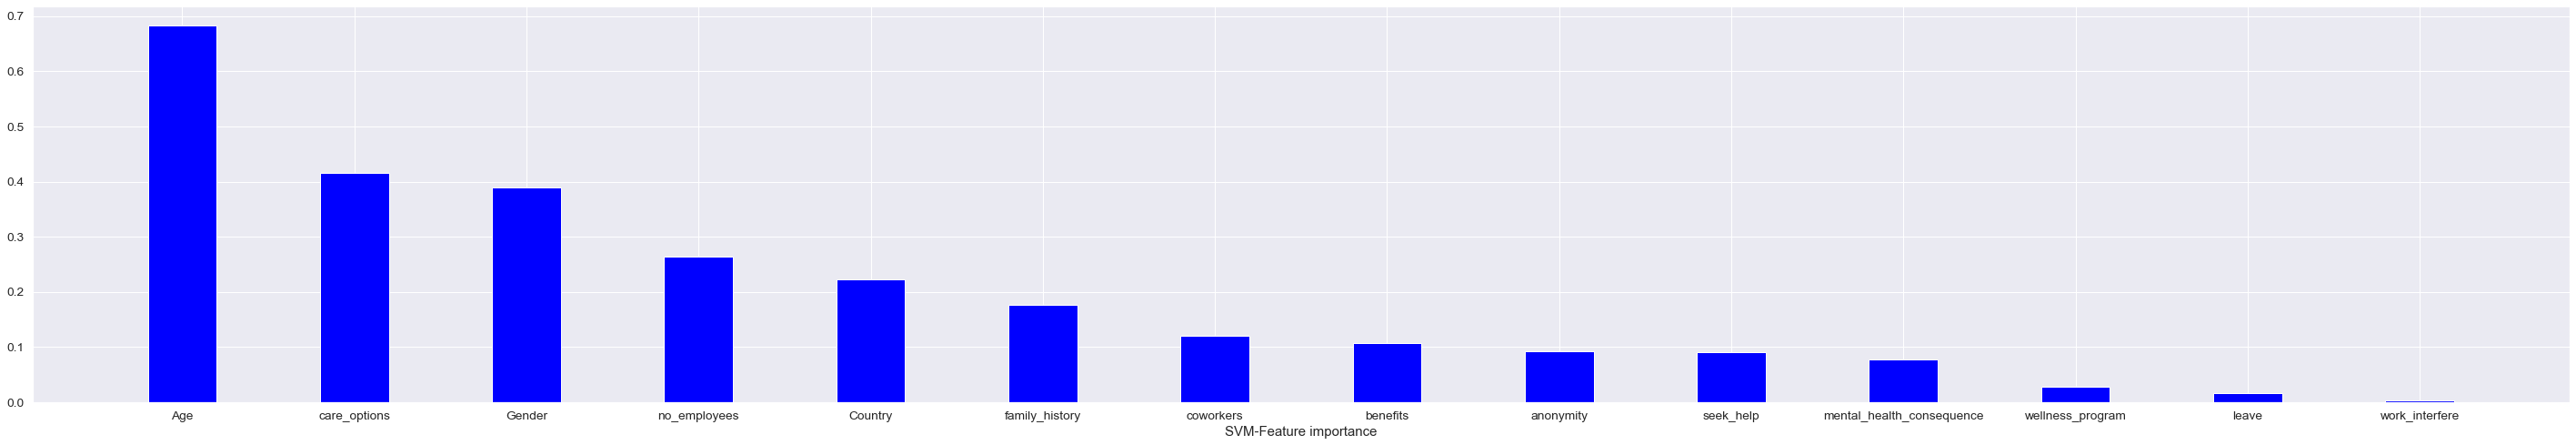

/var/folders/n0/cnv_hxcs0c1bs51vz986xl1h0000gn/T/ipykernel_97060/1044519682.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append({'Model': name,


In [52]:
#Chi-square test
features_chi2=chi2Importance(X,Y)
features_chi2=list(features_chi2.keys())[:14]

X1=data[features_chi2]
#scores=scores.iloc[0:0]

#split data with chi2 important features and train test svm model
X_train, X_test, Y_train, Y_test1=splitData(X1,Y)
name="SVM-chi2"
Y_pred1=trainAndTest(SVC(kernel='linear'),name, X_train, X_test, Y_train,Y_test1)

#SVM coefficients
features_svm=svmImpfeatures(model_SVM,X)
features_svm=list(features_svm.keys())[:14]

X2=data[features_svm]

#split data with svm important features and train test svm model
X_train, X_test, Y_train, Y_test2=splitData(X2,Y)
name="SVM-svm"
Y_pred2=trainAndTest(SVC(kernel='linear'), name, X_train, X_test, Y_train,Y_test2)


### Model metrics with selected features
SVM model with important features -chi2 and SVM coeff

In [53]:
scores

,Model,AUC,Precision,Recall,Accuracy,F1
0,Random Forest,0.7892,0.808824,0.814815,0.791837,0.811808
1,Decision Tree,0.7175,0.753846,0.725926,0.718367,0.739623
2,KNN,0.7678,0.804688,0.762963,0.767347,0.78327
3,SVM,0.7887,0.789116,0.859259,0.795918,0.822695
4,SVM-chi2,0.7813,0.786207,0.844444,0.787755,0.814286
5,SVM-svm,0.8044,0.798658,0.881481,0.812245,0.838028


#### Inference: 
Based on the evaluation,
The model gave better accuracy when we selected 14 most important features out of 23 features based on SVM coefficients.

Features that give high F1 score with SVM :  ['Age', 'care_options', 'Gender', 'no_employees', 'Country', 'family_history', 'coworkers', 'benefits', 'anonymity', 'seek_help', 'mental_health_consequence', 'wellness_program', 'leave', 'work_interfere']
Accuracy with reduced features -14


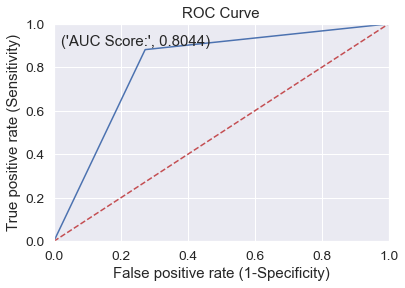

In [54]:
print ('Features that give high F1 score with SVM : ', features_svm)
print('Accuracy with reduced features -14')
#plot ROC with y_pred from svm model with important features from svm
plot_roc(Y_test2, Y_pred2)
plt.show()

### Performance estimation of model:

### Cross Validation using k-fold

Ideal: 0.817
> folds=2, accuracy=0.808 (0.808,0.809)
> folds=3, accuracy=0.813 (0.803,0.823)
> folds=4, accuracy=0.809 (0.797,0.826)
> folds=5, accuracy=0.813 (0.799,0.840)
> folds=6, accuracy=0.814 (0.784,0.833)
> folds=7, accuracy=0.816 (0.760,0.851)
> folds=8, accuracy=0.814 (0.771,0.856)
> folds=9, accuracy=0.816 (0.765,0.853)


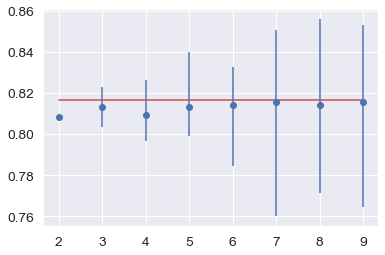

In [55]:
# sensitivity analysis of k in k-fold cross-validation
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# retrieve the model to be evaluate
def get_model():
    model = model_SVM
    return model
 
# evaluate the model using a given test condition
def evaluate_model(cv):
    # get the dataset
    X3=data[features_svm]
    y=data.treatment
    # get the model
    model = get_model()
    # evaluate the model
    scores = cross_val_score(model, X3, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,10)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

#### Inference: 
We could see that the mean classification accuracy from LOOCV is 0.817 and most of the k-folds have accuracy close to this

## Testing model with sample input

Let's test our model with different test cases

### Input 1:

Age':23 , 'care_options':'Yes', 'Gender':Trans, 'no_employees':26-100, 'Country':Belgium, 'family_history':Yes, 'coworkers':Yes, 'benefits':No,
'anonymity':YES, 'seek_help':YES, 'mental_health_consequence':NO, 'wellness_program':YES, 'leave':DON'T know, 'work_interfere':Never

In [56]:
new_input=[[0.41805,2,2,2,2,1,1,1,2,1,1,2,1,1]]
new_output=model_SVM.predict(new_input)

/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [57]:
print(new_output)

[0]


#### Inference:
For the above input we got Target value: 0 which means the employee will not seek treatment for mental health

### Input 2:

'Age':28, 'care_options': Not sure, 'Gender':Male, 'no_employees':6-25, 'Country':USA, 'family_history':Yes, 'coworkers':Yes, 'benefits':No, 
'anonymity:NO, 'seek_help':No, 'mental_health_consequence':Yes, 'wellness_program':Don't know, 'leave':Don't know, 'work_interfere':Never

In [58]:
new_input=[[0.80645161,1,1,4,44,1,2,1,1,1,2,0,1,1]]
new_output=model_SVM.predict(new_input)

/Users/aamrah/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [59]:
print(new_output)

[1]


#### Inference:
For the above input we got Target value: 1 which means the employee will seek treatment for mental health

## Conclusion:

Firstly, we built 4 models and compared their metrics namely, KNN, SVM, Decision Tree and Random Forest to predict "Treatment". From models evaluation SVM model gave high accuracy of 79.59% and F1 score of 82.2% when all features are considered. Random forest gave accuracy of 79.1% close to this. 
We conclude that SVM model performs best for our problem statement. So for this we made further model tuning by selecting 14 important features using svm coefficients and after model refitting with selected feature set we got accuracy of ~81.2% and F1 of ~83.8%. While performance estimation:of model:Leaveoneout method gave us a ideal test condition of 81.7%, k-fold cross validation method matched the ideal case with an accuracy of 81.6% with our model.

An employer can use SVM classifier with the following 14 notable features to predict if employees in their company would need to be treated for mental health and take actions to improve an employee's level of satisfaction at their firm; by making changes to work related conditions and providing treatment at the right time to potential ailments. 

### Our key features in this project are
Age, Gender, care options, work interference, family history, number of employees, coworkers, benefits, anonymity, leave, seek help, mental health consequences, wellness program, country. 

 
